# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# read pickle file
speeches_with_sentiment_raw = pd.read_csv('content_df_features.csv', index_col=0)
speeches_with_sentiment_raw

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,speech_content,date,faction,year,speech_length,age,gender,tenure,sentiment_score_1,sentiment_score_2
0,0,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,Meine Damen und Herren! Ich eröffne die 2. Sit...,1949-09-11,CDU/CSU,1949,546,57.0,männlich,0.000000,0.000000,0.047619
1,1,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,...,"Der Bundesrat ist versammelt, Herr Präsident.",1949-09-11,NaN,1949,45,NaN,NaN,0.000000,0.000000,0.000000
2,2,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,Ich danke für diese Erklärung. Ich stelle dami...,1949-09-11,CDU/CSU,1949,895,57.0,männlich,0.000000,0.133946,0.181818
3,3,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,...,"Ja, ich habe den Wunsch.",1949-09-11,NaN,1949,24,NaN,NaN,0.000000,0.000000,1.000000
4,4,1,2,NaN,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,Ich erteile dem Herrn Bundespräsidenten das Wort.,1949-09-11,CDU/CSU,1949,49,57.0,männlich,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966041,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,NaN,11004891,...,Sehr geehrte Frau Präsidentin! Meine Damen und...,2024-09-25,AfD,2024,1799,57.0,männlich,6.594521,0.112649,0.030534
966042,1075923,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,...,Herr Abgeordneter.,2024-09-25,DIE LINKE.,2024,18,61.0,weiblich,25.887671,0.000000,0.000000
966043,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,NaN,11004891,...,Vielen Dank.,2024-09-25,Fraktionslos,2024,12,57.0,männlich,6.594521,0.000000,0.500000
966044,1075925,20,187,petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,pau,7,Presidium of Parliament,Vizepräsidentin,11003206,...,Für die SPD-Fraktion hat die Kollegin Angelika...,2024-09-25,DIE LINKE.,2024,65,61.0,weiblich,25.887671,0.000000,0.000000


In [3]:
# read 03 final speach content topics csv
speech_content_topics_raw = pd.read_csv('03_final/speech_content_topics.csv', index_col=0)
# speeches_with_sentiment_raw sort by id
speech_content_topics_raw = speech_content_topics_raw.sort_values(by=['electoral_term', 'session', 'id'])
speech_content_topics_raw
speech_content_topics_raw

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,speech_content,date,topic
0,731990,17,14,Norbert,https://dip21.bundestag.de/dip21/btp/17/17014.pdf,Lammert,-1,Presidium of Parliament,präsident,11001274,die sitzung ist eröffnet\n\nliebe kolleginnen ...,2010-01-18 22:00:00,Arbeit
1,731991,17,14,Volker,https://dip21.bundestag.de/dip21/btp/17/17014.pdf,Beck,4,Member of Parliament,NaN,11002625,herr präsident meine damen und herren wir bean...,2010-01-18 22:00:00,Außenpolitik: Naher Osten
2,731992,17,14,Norbert,https://dip21.bundestag.de/dip21/btp/17/17014.pdf,Lammert,-1,Presidium of Parliament,präsident,11001274,herr kollege beck\n\n,2010-01-18 22:00:00,No Topic
3,731993,17,14,Volker,https://dip21.bundestag.de/dip21/btp/17/17014.pdf,Beck,4,Member of Parliament,NaN,11002625,all diese fragen zeigen dass ihr gesetz das zi...,2010-01-18 22:00:00,Arbeit
4,731994,17,14,Norbert,https://dip21.bundestag.de/dip21/btp/17/17014.pdf,Lammert,-1,Presidium of Parliament,präsident,11001274,herr kollege beck sie wissen ja dass mein beso...,2010-01-18 22:00:00,No Topic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11897,1075922,20,187,Thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,Seitz,-1,Not found,NaN,11004891,\n\nsehr geehrte frau präsidentin meine damen ...,2024-09-25,Bürger:innenrechte
11898,1075923,20,187,Petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,Pau,-1,Presidium of Parliament,Vizepräsidentin,11003206,\n\nherr abgeordneter,2024-09-25,No Topic
11899,1075924,20,187,Thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,Seitz,18,Member of Parliament,NaN,11004891,\n\nvielen dank\n\n0,2024-09-25,No Topic
11900,1075925,20,187,Petra,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,Pau,-1,Presidium of Parliament,Vizepräsidentin,11003206,\n\nfür die spdfraktion hat die kollegin angel...,2024-09-25,No Topic


# 2. Data preparation

In [4]:
speeches_with_sentiment=speeches_with_sentiment_raw.copy()
# filter out all where position short is presidium of parliament
speeches_with_sentiment = speeches_with_sentiment[speeches_with_sentiment['position_short'] != 'Presidium of Parliament']
speeches_with_sentiment

speeches_with_sentiment['month_year']= pd.to_datetime(speeches_with_sentiment['date']).dt.to_period('M')

In [5]:
speeches_with_sentiment.tail()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,date,faction,year,speech_length,age,gender,tenure,sentiment_score_1,sentiment_score_2,month_year
966037,1075918,20,187,karoline,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,otte,4,Member of Parliament,NaN,11005172,...,2024-09-25,Bündnis 90/Die Grünen,2024,2870,28.0,weiblich,2.701370,0.124320,0.114428,2024-09
966039,1075920,20,187,peter,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,aumer,5,Member of Parliament,NaN,11004004,...,2024-09-25,CDU/CSU,2024,3166,48.0,männlich,14.668493,0.134362,0.076000,2024-09
966041,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,NaN,11004891,...,2024-09-25,AfD,2024,1799,57.0,männlich,6.594521,0.112649,0.030534,2024-09
966043,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,NaN,11004891,...,2024-09-25,Fraktionslos,2024,12,57.0,männlich,6.594521,0.000000,0.500000,2024-09
966045,1075926,20,187,angelika,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,glöckner,25,Member of Parliament,NaN,11004614,...,2024-09-25,SPD,2024,2561,62.0,weiblich,9.780822,0.196735,0.016216,2024-09


# 3. Statistics

## 3.1 Total Sentiment Scores

### 3.1.1 Mean

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


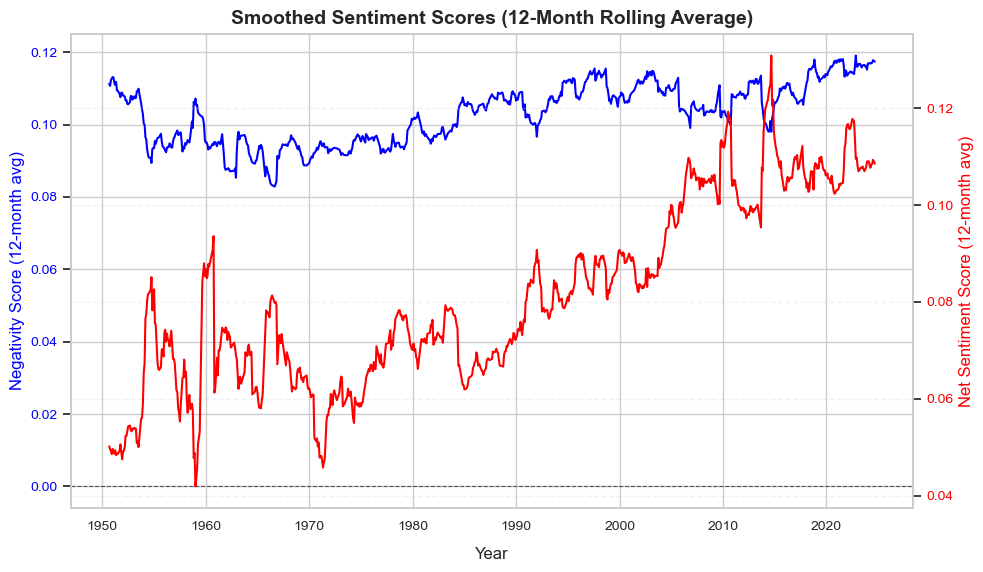

In [105]:
sentiment_by_month = speeches_with_sentiment.groupby(['month_year']).agg({'sentiment_score_1': ['mean', 'median', 'std'], 'sentiment_score_2': ['mean', 'median', 'std']}).reset_index()

sentiment_by_month.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in sentiment_by_month.columns]

# Ensure 'month_year' is a datetime object
sentiment_by_month['month_year'] = sentiment_by_month['month_year'].dt.to_timestamp()

# Applying 12-month rolling mean to the mean sentiment scores
sentiment_by_month['sentiment_score_1_smoothed'] = sentiment_by_month['sentiment_score_1_mean'].rolling(window=12).mean()
sentiment_by_month['sentiment_score_2_smoothed'] = sentiment_by_month['sentiment_score_2_mean'].rolling(window=12).mean()

# Set Seaborn style for academic graphs
sns.set_theme(style="whitegrid")

# Create the plot with Seaborn styling
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Sentiment Score 1 on the primary y-axis
ax1.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_1_smoothed'],
         color='blue', linewidth=1.5)
ax1.set_xlabel('Year', fontsize=12, labelpad=10)
ax1.set_ylabel('Negativity Score (12-month avg)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)

# Plot Sentiment Score 2 on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_smoothed'],
         color='red', linewidth=1.5)
ax2.set_ylabel('Net Sentiment Score (12-month avg)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=10)

# Adding a title and legends
fig.suptitle('Smoothed Sentiment Scores (12-Month Rolling Average)', fontsize=14, weight='bold', y=0.95)
ax1.legend(loc='upper left', fontsize=10, frameon=False)
ax2.legend(loc='upper right', fontsize=10, frameon=False)

# Enhancing gridlines and layout
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# save plot
fig.savefig('sentiment_scores_smoothed.png', dpi=300)

Calculate the increase since Germany's reunification

In [7]:
# Find the closest available date to October 1990 and September 2024
start_date = sentiment_by_month[sentiment_by_month['month_year'] >= '1990-10-01'].iloc[0]
end_date = sentiment_by_month[sentiment_by_month['month_year'] <= '2024-09-01'].iloc[-1]

# Extract the smoothed sentiment scores for the closest dates
start_score_1 = start_date['sentiment_score_1_smoothed']
end_score_1 = end_date['sentiment_score_1_smoothed']

start_score_2 = start_date['sentiment_score_2_smoothed']
end_score_2 = end_date['sentiment_score_2_smoothed']

# Calculate the differences
difference_score_1 = end_score_1/start_score_1 -1
difference_score_2 = end_score_2/start_score_2 -1

# Display the results
print("Increase in Negativity since Reunification: ", difference_score_1)
print("Increase in Net_sentiment  since Reunification: ", difference_score_2)

Increase in Negativity since Reunification:  0.12851890623686235
Increase in Net_sentiment  since Reunification:  0.4213406150489605


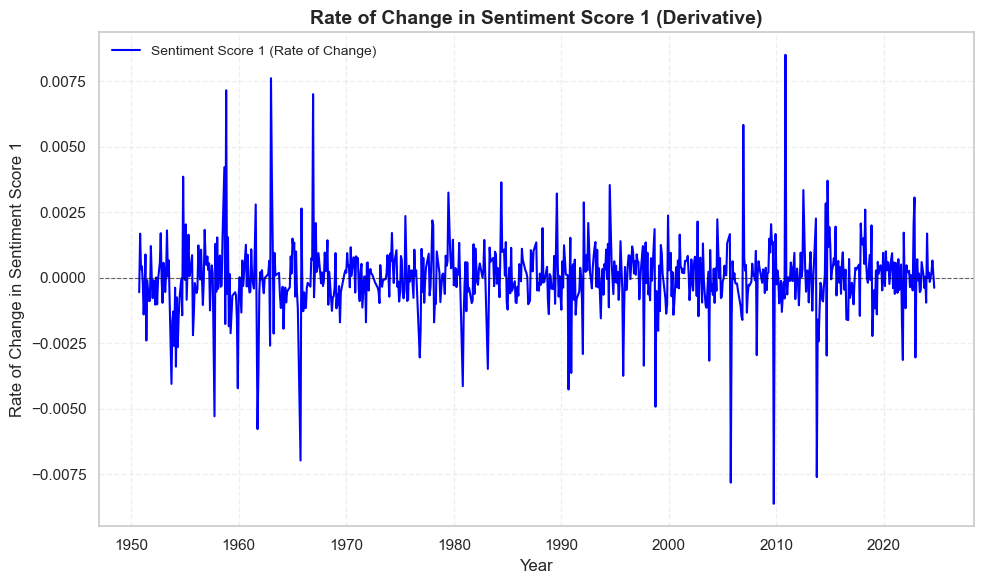

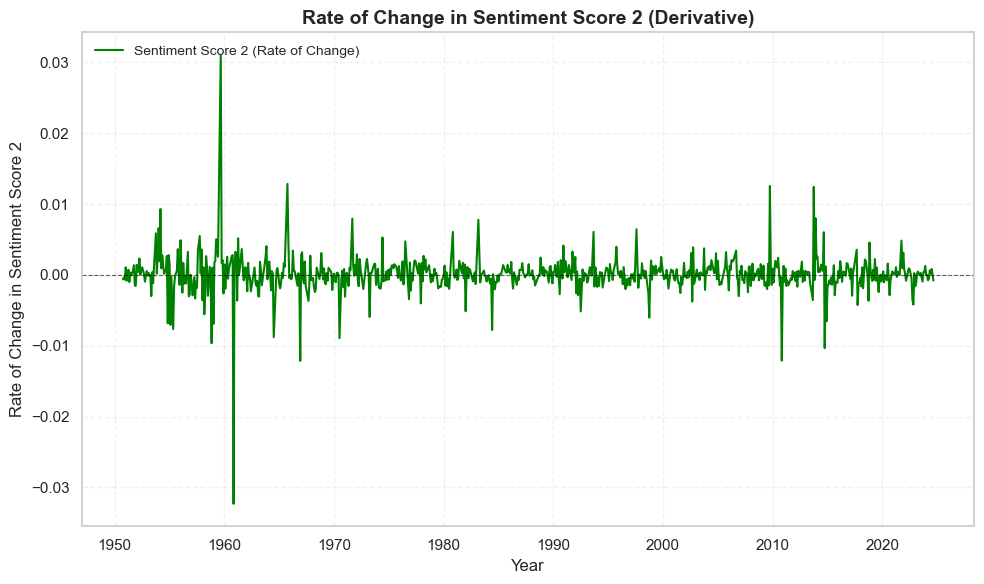

In [8]:
# Calculate the derivative (rate of change) for Sentiment Score 1
sentiment_by_month['sentiment_score_1_derivative'] = sentiment_by_month['sentiment_score_1_smoothed'].diff()
sentiment_by_month['sentiment_score_2_derivative'] = sentiment_by_month['sentiment_score_2_smoothed'].diff()

# Set Seaborn style for academic graphs
sns.set_theme(style="whitegrid")

# Create a plot for the derivative of Sentiment Score 1
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_1_derivative'],
         color='blue', linewidth=1.5, label='Sentiment Score 1 (Rate of Change)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate of Change in Sentiment Score 1', fontsize=12)
plt.title('Rate of Change in Sentiment Score 1 (Derivative)', fontsize=14, weight='bold')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=10, frameon=False)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('sentiment_score_1_derivative.png', dpi=300)
plt.show()

# Create a plot for the derivative of Sentiment Score 2
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_derivative'],
         color='green', linewidth=1.5, label='Sentiment Score 2 (Rate of Change)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate of Change in Sentiment Score 2', fontsize=12)
plt.title('Rate of Change in Sentiment Score 2 (Derivative)', fontsize=14, weight='bold')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=10, frameon=False)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('sentiment_score_2_derivative.png', dpi=300)
plt.show()

Analyze the peaks

In [9]:
# Recalculate the derivative (rate of change) for Sentiment Score 2
sentiment_by_month['sentiment_score_2_derivative_not_smoothed'] = sentiment_by_month['sentiment_score_2_mean'].diff()

# Identify the top 3 peaks (positive and negative) for Sentiment Score 2 derivatives
top_peaks_up = sentiment_by_month.nlargest(10, 'sentiment_score_2_derivative_not_smoothed')[['month_year', 'sentiment_score_2_derivative_not_smoothed']]
top_peaks_down = sentiment_by_month.nsmallest(10, 'sentiment_score_2_derivative_not_smoothed')[['month_year', 'sentiment_score_2_derivative_not_smoothed']]

# Display the results
print("Top 10 Peaks (Positive):", top_peaks_up)
print("Top 10 Peaks (Negative):", top_peaks_down)


Top 10 Peaks (Positive):     month_year  sentiment_score_2_derivative_not_smoothed
106 1959-09-01                                   0.412555
664 2013-10-01                                   0.179982
621 2009-10-01                                   0.155311
165 1965-10-01                                   0.137141
87  1957-10-01                                   0.100926
44  1953-10-01                                   0.094964
435 1992-09-01                                   0.092421
339 1983-03-01                                   0.091072
215 1970-09-01                                   0.089772
49  1954-03-01                                   0.088714
Top 10 Peaks (Negative):     month_year  sentiment_score_2_derivative_not_smoothed
107 1959-10-01                                  -0.406523
166 1965-11-01                                  -0.172052
88  1957-11-01                                  -0.139729
665 2013-11-01                                  -0.133337
622 2009-11-01        

### 3.1.2 Standard Deviation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


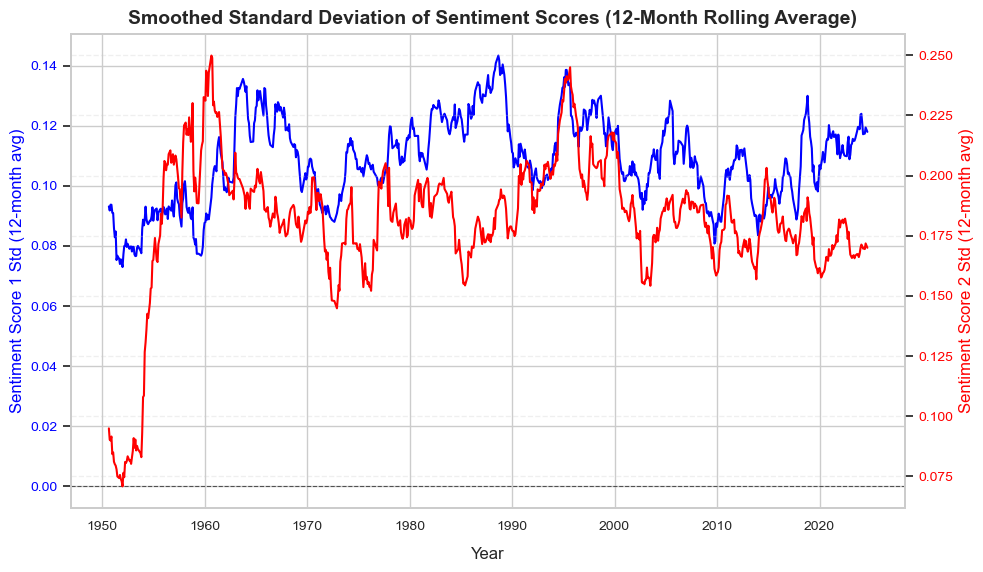

In [10]:
# Applying 12-month rolling mean to the standard deviation of sentiment scores
sentiment_by_month['sentiment_score_1_std_smoothed'] = sentiment_by_month['sentiment_score_1_std'].rolling(window=12).mean()
sentiment_by_month['sentiment_score_2_std_smoothed'] = sentiment_by_month['sentiment_score_2_std'].rolling(window=12).mean()

# Set Seaborn style for academic graphs
sns.set_theme(style="whitegrid")

# Create the plot with Seaborn styling
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the smoothed standard deviation for Sentiment Score 1
ax1.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_1_std_smoothed'],
         color='blue', linewidth=1.5)
ax1.set_xlabel('Year', fontsize=12, labelpad=10)
ax1.set_ylabel('Sentiment Score 1 Std (12-month avg)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
ax1.tick_params(axis='x', labelsize=10)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)

# Plot the smoothed standard deviation for Sentiment Score 2 on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_std_smoothed'],
         color='red', linewidth=1.5)
ax2.set_ylabel('Sentiment Score 2 Std (12-month avg)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=10)

# Adding a title and legends
fig.suptitle('Smoothed Standard Deviation of Sentiment Scores (12-Month Rolling Average)', fontsize=14, weight='bold', y=0.95)
ax1.legend(loc='upper left', fontsize=10, frameon=False)
ax2.legend(loc='upper right', fontsize=10, frameon=False)

# Enhancing gridlines and layout
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

# Save the plot
fig.savefig('sentiment_scores_std_smoothed.png', dpi=300)
plt.show()

In [11]:
# Identify the top 10 peaks (positive and negative) for Sentiment Score 1 and 2 
top_peaks_up_std_score1 = sentiment_by_month.nlargest(10, 'sentiment_score_1_std')[['month_year', 'sentiment_score_1_std']]
top_peaks_down_std_score1 = sentiment_by_month.nsmallest(10, 'sentiment_score_1_std')[['month_year', 'sentiment_score_1_std']]

# Display the results
print("Top 10 Peaks Up Std Score1:", top_peaks_up_std_score1)
print("Top 10 Peaks Down Std Score1:", top_peaks_down_std_score1)


top_peaks_up_std_score2 = sentiment_by_month.nlargest(10, 'sentiment_score_2_std')[['month_year', 'sentiment_score_2_std']]
top_peaks_down_std_score2 = sentiment_by_month.nsmallest(10, 'sentiment_score_2_std')[['month_year', 'sentiment_score_2_std']]
print("Top 10 Peaks Up Std Score2:", top_peaks_up_std_score2)
print("Top 10 Peaks Down Std Score2:", top_peaks_down_std_score2)


Top 10 Peaks Up Std Score1:     month_year  sentiment_score_1_std
456 1994-07-01               0.254056
566 2004-07-01               0.221204
715 2018-04-01               0.216796
156 1964-11-01               0.188319
463 1995-04-01               0.184894
592 2007-02-01               0.184006
416 1990-11-01               0.183582
475 1996-05-01               0.183556
382 1987-09-01               0.180482
88  1957-11-01               0.179718
Top 10 Peaks Down Std Score1:     month_year  sentiment_score_1_std
402 1989-08-01               0.024940
87  1957-10-01               0.026665
621 2009-10-01               0.028200
97  1958-09-01               0.028465
165 1965-10-01               0.030007
729 2019-07-01               0.034589
277 1976-11-01               0.042121
127 1961-10-01               0.043426
544 2002-08-01               0.046616
126 1961-08-01               0.048816
Top 10 Peaks Up Std Score2:     month_year  sentiment_score_2_std
106 1959-09-01               0.471562
88

In [12]:
# Define all electoral term periods
electoral_terms = [
    {'term': '1st', 'start': '1949-09-07', 'end': '1953-10-06'},
    {'term': '2nd', 'start': '1953-10-06', 'end': '1957-10-15'},
    {'term': '3rd', 'start': '1957-10-15', 'end': '1961-10-17'},
    {'term': '4th', 'start': '1961-10-17', 'end': '1965-10-19'},
    {'term': '5th', 'start': '1965-10-19', 'end': '1969-10-20'},
    {'term': '6th', 'start': '1969-10-20', 'end': '1972-12-13'},
    {'term': '7th', 'start': '1972-12-13', 'end': '1976-12-14'},
    {'term': '8th', 'start': '1976-12-14', 'end': '1980-11-04'},
    {'term': '9th', 'start': '1980-11-04', 'end': '1983-03-29'},
    {'term': '10th', 'start': '1983-03-29', 'end': '1987-02-18'},
    {'term': '11th', 'start': '1987-02-18', 'end': '1990-12-20'},
    {'term': '12th', 'start': '1990-12-20', 'end': '1994-11-10'},
    {'term': '13th', 'start': '1994-11-10', 'end': '1998-10-26'},
    {'term': '14th', 'start': '1998-10-26', 'end': '2002-10-17'},
    {'term': '15th', 'start': '2002-10-17', 'end': '2005-10-18'},
    {'term': '16th', 'start': '2005-10-18', 'end': '2009-10-27'},
    {'term': '17th', 'start': '2009-10-27', 'end': '2013-10-22'},
    {'term': '18th', 'start': '2013-10-22', 'end': '2017-10-24'},
    {'term': '19th', 'start': '2017-10-24', 'end': '2021-10-26'},
    {'term': '20th', 'start': '2021-10-26', 'end': '2025-10-26'}
]

# Convert start and end dates to datetime
for term in electoral_terms:
    term['start'] = pd.to_datetime(term['start'])
    term['end'] = pd.to_datetime(term['end'])

# Ensure the date column in speeches_with_sentiment is datetime
speeches_with_sentiment['date'] = pd.to_datetime(speeches_with_sentiment['date'])

# Calculate standard deviation for each electoral term
results = []
previous_std_dev = None  # To calculate the difference from the previous term

for term in electoral_terms:
    # Filter data for the current electoral term
    mask = (speeches_with_sentiment['date'] >= term['start']) & (speeches_with_sentiment['date'] <= term['end'])
    term_data = speeches_with_sentiment.loc[mask]

    # Calculate standard deviation of sentiment scores
    std_dev = term_data['sentiment_score_1'].std()
    difference_from_previous = std_dev / previous_std_dev -1 if previous_std_dev is not None else None
    previous_std_dev = std_dev

    # Append results
    results.append({
        'term': term['term'],
        'date_range': f"{term['start'].date()} - {term['end'].date()}",
        'average_std_dev': std_dev,
        'difference_from_previous': difference_from_previous
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print("Average Standard Deviation per Electoral Term with Differences:")
print(results_df)


Average Standard Deviation per Electoral Term with Differences:
    term               date_range  average_std_dev  difference_from_previous
0    1st  1949-09-07 - 1953-10-06         0.087408                       NaN
1    2nd  1953-10-06 - 1957-10-15         0.096323                  0.102001
2    3rd  1957-10-15 - 1961-10-17         0.103949                  0.079171
3    4th  1961-10-17 - 1965-10-19         0.132541                  0.275050
4    5th  1965-10-19 - 1969-10-20         0.120300                 -0.092355
5    6th  1969-10-20 - 1972-12-13         0.101080                 -0.159763
6    7th  1972-12-13 - 1976-12-14         0.113141                  0.119318
7    8th  1976-12-14 - 1980-11-04         0.117565                  0.039097
8    9th  1980-11-04 - 1983-03-29         0.123061                  0.046755
9   10th  1983-03-29 - 1987-02-18         0.129990                  0.056300
10  11th  1987-02-18 - 1990-12-20         0.129027                 -0.007403
11  12th  19

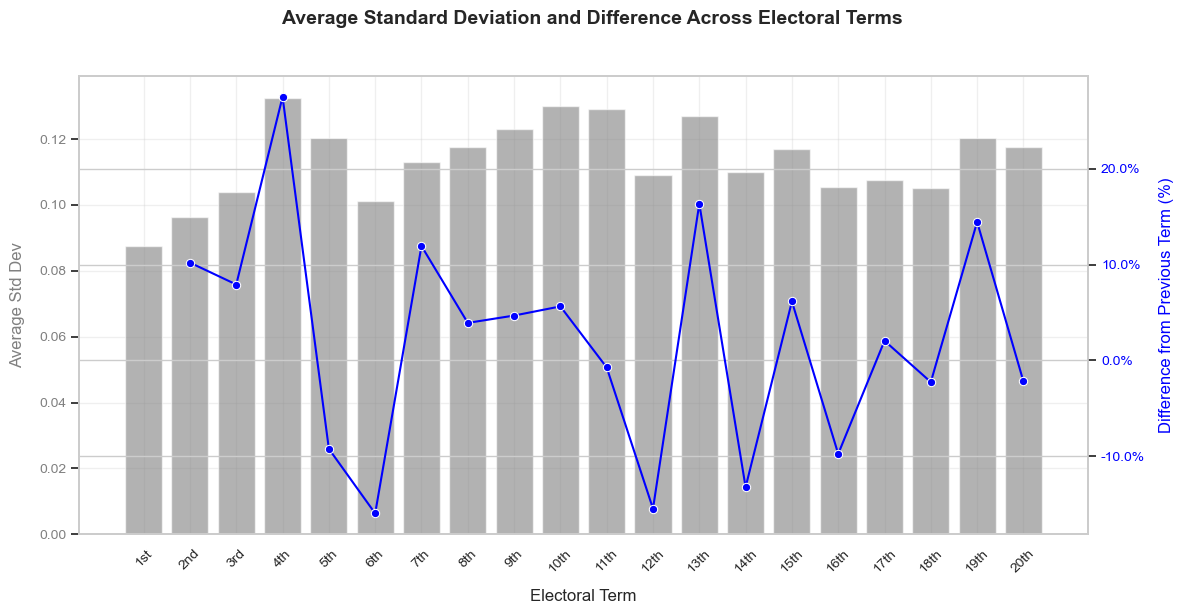

In [107]:
from matplotlib.ticker import FuncFormatter

# Set Seaborn style for academic papers
sns.set_theme(style="whitegrid")

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for average standard deviation
sns.barplot(
    x="term",
    y="average_std_dev",
    data=results_df,
    ax=ax1,
    color='grey',
    alpha=0.6
)
ax1.set_xlabel('Electoral Term', fontsize=12, labelpad=10)
ax1.set_ylabel('Average Std Dev', fontsize=12, color='grey', labelpad=10)
ax1.tick_params(axis='y', labelcolor='grey', labelsize=10)
ax1.tick_params(axis='x', labelsize=10, rotation=45)

# Line plot for difference from previous term on secondary axis
ax2 = ax1.twinx()
sns.lineplot(
    x="term",
    y="difference_from_previous",
    data=results_df,
    ax=ax2,
    color='blue',
    marker='o'
)
ax2.set_ylabel('Difference from Previous Term (%)', fontsize=12, color='blue', labelpad=10)

ax2.tick_params(axis='y', labelcolor='blue', labelsize=10)

# Format right axis as percentage
def to_percent(value, _):
    return f"{value * 100:.1f}%"

ax2.yaxis.set_major_formatter(FuncFormatter(to_percent))

# Title and layout adjustments
fig.suptitle(
    'Average Standard Deviation and Difference Across Electoral Terms',
    fontsize=14,
    weight='bold',
    y=1.02
)
ax1.grid(alpha=0.3)
plt.tight_layout()

#save plot
fig.savefig('average_std_deviation_electoral_term.png', dpi=300)

# Show the plot
plt.show()




Below: Not relevant, no interesting insights!

Summary statistics by governing faction:
                 governing_faction      mean       std
0                          CDU/CSU  0.096622  0.103961
1                     CDU/CSU, FDP  0.103241  0.122273
2                 CDU/CSU, FDP, DP  0.108947  0.087408
3             CDU/CSU, FDP, GB/BHE  0.096509  0.096329
4                     CDU/CSU, SPD  0.109325  0.111263
5       SPD, Bündnis 90/Die Grünen  0.109107  0.112911
6                         SPD, FDP  0.095234  0.113981
7  SPD, FDP, Bündnis 90/Die Grünen  0.117064  0.117729
Correlation matrix:
                                 sentiment_score_1   CDU/CSU  CDU/CSU, FDP  \
sentiment_score_1                         1.000000 -0.009596     -0.004081   
CDU/CSU                                  -0.009596  1.000000     -0.131902   
CDU/CSU, FDP                             -0.004081 -0.131902      1.000000   
CDU/CSU, FDP, DP                          0.006653 -0.023349     -0.127546   
CDU/CSU, FDP, GB/BHE                     -0.009861 -0.

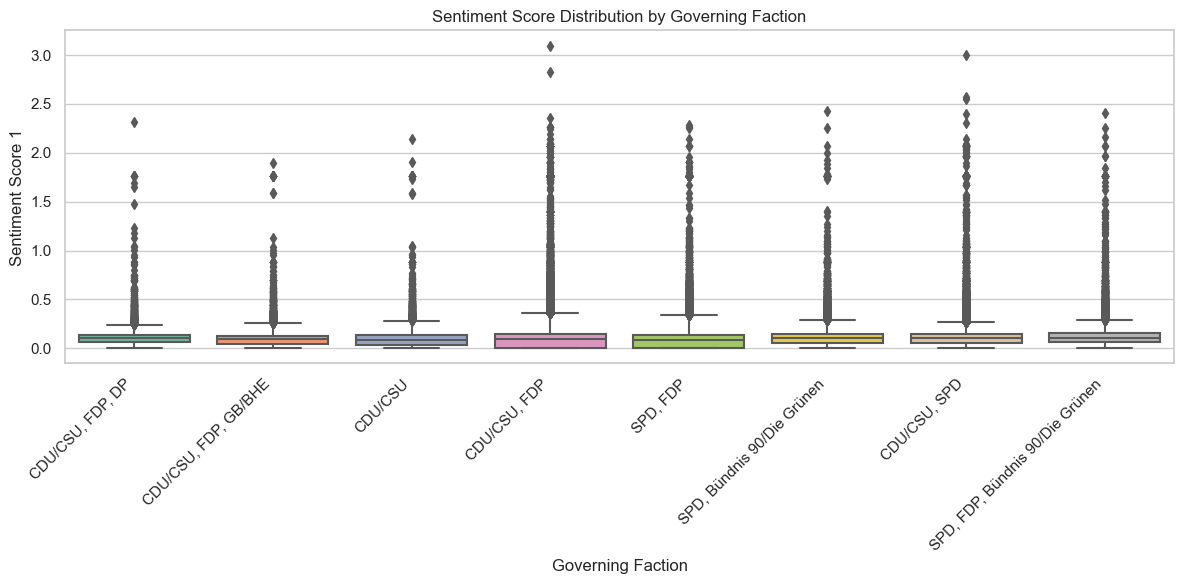

In [14]:
correlation_experiment = speeches_with_sentiment.copy()
# Map electoral terms to governing factions
regierung_mapping = {
    1: ['CDU/CSU', 'FDP', 'DP'],
    2: ['CDU/CSU', 'FDP', 'GB/BHE'],
    3: ['CDU/CSU'],
    4: ['CDU/CSU', 'FDP'],
    5: ['CDU/CSU', 'FDP'],
    6: ['SPD', 'FDP'],
    7: ['SPD', 'FDP'],
    8: ['SPD', 'FDP'],
    9: ['SPD', 'FDP'],
    10: ['CDU/CSU', 'FDP'],
    11: ['CDU/CSU', 'FDP'],
    12: ['CDU/CSU', 'FDP'],
    13: ['CDU/CSU', 'FDP'],
    14: ['SPD', 'Bündnis 90/Die Grünen'],
    15: ['SPD', 'Bündnis 90/Die Grünen'],
    16: ['CDU/CSU', 'SPD'],
    17: ['CDU/CSU', 'FDP'],
    18: ['CDU/CSU', 'SPD'],
    19: ['CDU/CSU', 'SPD'],
    20: ['SPD', 'FDP', 'Bündnis 90/Die Grünen']
}

# Add governing faction to the speeches data
def map_governing_faction(date):
    for term, parties in regierung_mapping.items():
        term_data = electoral_terms[term - 1]  # Electoral terms are 0-indexed in the list
        start, end = pd.to_datetime(term_data['start']), pd.to_datetime(term_data['end'])
        if start <= date <= end:
            return ', '.join(parties)
    return None

correlation_experiment['governing_faction'] = correlation_experiment['date'].apply(map_governing_faction)

# Summary statistics by governing faction
summary_stats = correlation_experiment.groupby('governing_faction')['sentiment_score_1'].agg(['mean', 'std']).reset_index()

print("Summary statistics by governing faction:")
print(summary_stats)

# Correlation analysis
coalition_dummies = pd.get_dummies(correlation_experiment['governing_faction'])
correlation_experiment = pd.concat([correlation_experiment, coalition_dummies], axis=1)
correlation_matrix = correlation_experiment[['sentiment_score_1'] + list(coalition_dummies.columns)].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualization: Boxplot of sentiment scores by governing faction
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='governing_faction',
    y='sentiment_score_1',
    data=correlation_experiment,
    palette='Set2'
)
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Score Distribution by Governing Faction')
plt.ylabel('Sentiment Score 1')
plt.xlabel('Governing Faction')
plt.tight_layout()
plt.show()


Correlation matrix (sentiment_score_1 and governing factions):
sentiment_score_1                            1.000000
coalition_CDU/CSU                           -0.009596
coalition_CDU/CSU, FDP                      -0.004081
coalition_CDU/CSU, FDP, DP                   0.006653
coalition_CDU/CSU, FDP, GB/BHE              -0.009861
coalition_CDU/CSU, SPD                       0.021258
coalition_SPD, Bündnis 90/Die Grünen         0.014539
coalition_SPD, FDP                          -0.036476
coalition_SPD, FDP, Bündnis 90/Die Grünen    0.027768
Name: sentiment_score_1, dtype: float64


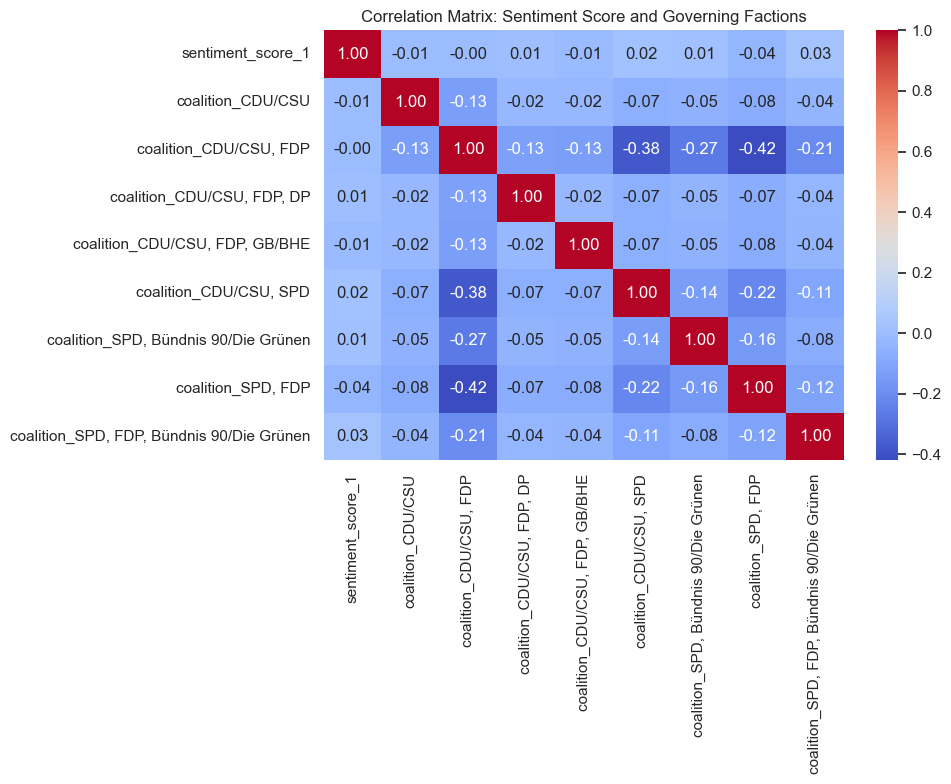

In [16]:
# Create dummy variables for governing factions
coalition_dummies = pd.get_dummies(correlation_experiment['governing_faction'], prefix='coalition')

# Combine sentiment scores with the dummy variables
correlation_data = pd.concat([correlation_experiment[['sentiment_score_1']], coalition_dummies], axis=1)

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Extract correlations specifically for 'sentiment_score_1'
sentiment_correlation = correlation_matrix.loc['sentiment_score_1']

# Display the correlation matrix
print("Correlation matrix (sentiment_score_1 and governing factions):")
print(sentiment_correlation)

# Optional: Visualize the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix: Sentiment Score and Governing Factions")
plt.tight_layout()
plt.show()

### 3.1.3 Comparison to election years

Proportion of positive derivatives in election months: 0.56
Proportion of positive derivatives in post-election months: 0.79
Proportion of negative derivatives in two month post-election months: 0.68


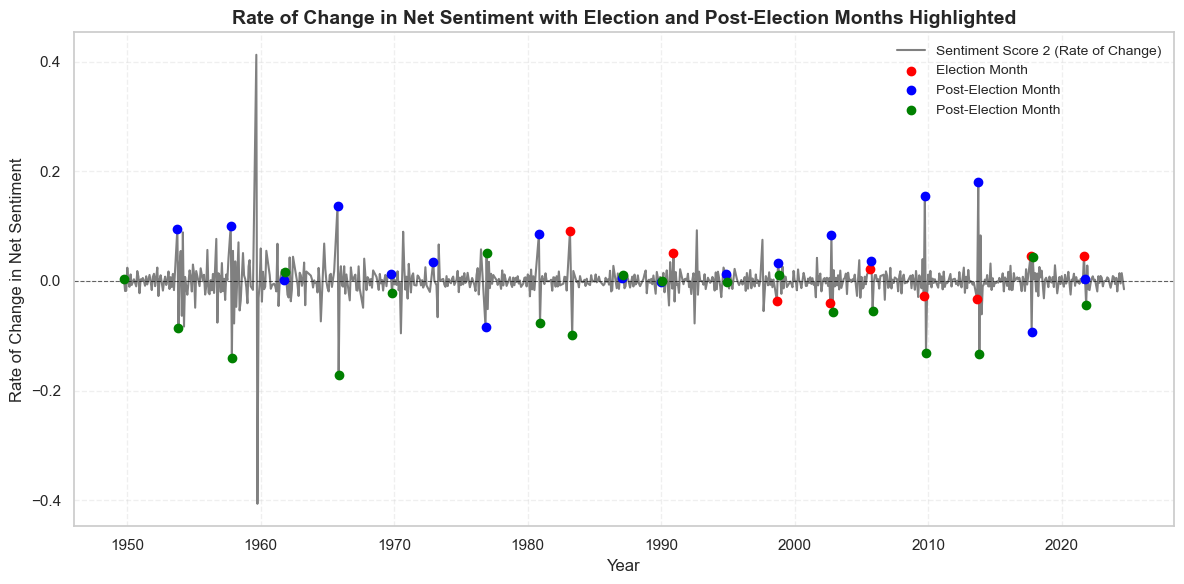

In [17]:
# Define election months (exact dates)
election_dates = {
    1949: 8, 1953: 9, 1957: 9, 1961: 9, 1965: 9,
    1969: 9, 1972: 11, 1976: 10, 1980: 10, 1983: 3,
    1987: 1, 1990: 12, 1994: 10, 1998: 9, 2002: 9,
    2005: 9, 2009: 9, 2013: 9, 2017: 9, 2021: 9
}

# Create a flag for election months
sentiment_by_month['is_election_month'] = sentiment_by_month.apply(
    lambda row: row['month_year'].year in election_dates and row['month_year'].month == election_dates[row['month_year'].year],
    axis=1
)

# Create a flag for the month after elections
sentiment_by_month['is_post_election_month'] = sentiment_by_month.apply(
    lambda row: row['month_year'].year in election_dates and row['month_year'].month == ((election_dates[row['month_year'].year] % 12) + 1),
    axis=1
)

# Create a flag for the month after elections
sentiment_by_month['is_2_month_post_election'] = sentiment_by_month.apply(
    lambda row: row['month_year'].year in election_dates and row['month_year'].month == ((election_dates[row['month_year'].year] % 12) + 2),
    axis=1
)


# Analyze positive derivatives in election months
election_months = sentiment_by_month[sentiment_by_month['is_election_month']]
positive_election_derivatives = election_months[election_months['sentiment_score_2_derivative_not_smoothed'] > 0]
proportion_positive_election = len(positive_election_derivatives) / len(election_months)

# Analyze positive derivatives in post-election months
post_election_months = sentiment_by_month[sentiment_by_month['is_post_election_month']]
positive_post_election_derivatives = post_election_months[post_election_months['sentiment_score_2_derivative_not_smoothed'] > 0]
proportion_positive_post_election = len(positive_post_election_derivatives) / len(post_election_months)

# Analyze negative derivatives in two month post-election 
two_month_post_election = sentiment_by_month[sentiment_by_month['is_2_month_post_election']]
negative_2_post_election_derivatives = two_month_post_election[two_month_post_election['sentiment_score_2_derivative_not_smoothed'] < 0]
proportion_negative_2_month_post_election = len(negative_2_post_election_derivatives) / len(two_month_post_election)

# Display results
print(f"Proportion of positive derivatives in election months: {proportion_positive_election:.2f}")
print(f"Proportion of positive derivatives in post-election months: {proportion_positive_post_election:.2f}")
print(f"Proportion of negative derivatives in two month post-election months: {proportion_negative_2_month_post_election:.2f}")

# Plot sentiment derivatives with election and post-election months highlighted
plt.figure(figsize=(12, 6))
plt.plot(sentiment_by_month['month_year'], sentiment_by_month['sentiment_score_2_derivative_not_smoothed'],
         label='Sentiment Score 2 (Rate of Change)', color='gray', linewidth=1.5)

# Highlight election months
plt.scatter(election_months['month_year'], election_months['sentiment_score_2_derivative_not_smoothed'],
            color='red', label='Election Month', zorder=5)

# Highlight post-election months
plt.scatter(post_election_months['month_year'], post_election_months['sentiment_score_2_derivative_not_smoothed'],
            color='blue', label='Post-Election Month', zorder=5)

# Highlight 2 post-election months
plt.scatter(two_month_post_election['month_year'], two_month_post_election['sentiment_score_2_derivative_not_smoothed'],
            color='green', label='Post-Election Month', zorder=5)

# Add labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate of Change in Net Sentiment', fontsize=12)
plt.title('Rate of Change in Net Sentiment with Election and Post-Election Months Highlighted',
          fontsize=14, weight='bold')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.6)
plt.legend(fontsize=10, frameon=False)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()

# Save the plot
plt.savefig('sentiment_score_2_election_post_election_months.png', dpi=300)
plt.show()

## 3.2 Sentiment per faction by time

In [18]:
# calculate average, median and standard deviation of negativity score per faction
sentiment_by_party_electoral_term = speeches_with_sentiment.groupby(['faction', 'electoral_term']).agg({'sentiment_score_1': ['mean', 'median', 'std'], 'sentiment_score_2': ['mean', 'median', 'std']}).reset_index()
sentiment_by_party_electoral_term

faction electoral_term sentiment_score_1            \
                                                       mean    median   
0                      AfD             19          0.134726  0.128117   
1                      AfD             20          0.140196  0.132801   
2                       BP              1          0.105414  0.106197   
3    Bündnis 90/Die Grünen             10          0.114328  0.110496   
4    Bündnis 90/Die Grünen             11          0.118288  0.113685   
..                     ...            ...               ...       ...   
112                    SPD             19          0.108690  0.096676   
113                    SPD             20          0.106100  0.096156   
114                    SSW              1          0.092380  0.086556   
115                    WAV              1          0.128414  0.124925   
116                      Z              1          0.109995  0.109257   

              sentiment_score_2                      
          std              mean    median       std  
0    0.113722          0.074803  0.054823  0.158165  
1    0.133994          0.066763  0.044534  0.158713  
2    0.060228          0.049723  0.051355  0.074853  
3    0.121676          0.049519  0.040000  0.161696  
4    0.126784          0.060702  0.043478  0.172214  
..        ...               ...       ...       ...  
112  0.121860          0.116809  0.100457  0.167048  
113  0.110269          0.126607  0.106557  0.169693  
114  0.070406          0.069825  0.047835  0.115601  
115  0.088275          0.032946  0.027650  0.069130  
116  0.072553          0.050405  0.055556  0.070689  

[117 rows x 8 columns]

In [19]:
# calculate average, median and standard deviation of negativity score per faction
sentiment_by_party = speeches_with_sentiment.groupby(['faction']).agg({'sentiment_score_1': ['mean', 'median', 'std'], 'sentiment_score_2': ['mean', 'median', 'std']}).reset_index()
sentiment_by_party

faction sentiment_score_1                      \
                                       mean    median       std   
0                     AfD          0.137195  0.130074  0.123310   
1                      BP          0.105414  0.106197  0.060228   
2   Bündnis 90/Die Grünen          0.115866  0.110902  0.113374   
3                 CDU/CSU          0.099789  0.089752  0.117747   
4                      DA          0.087238  0.099577  0.073748   
5              DIE LINKE.          0.127951  0.124975  0.098250   
6                      DP          0.105767  0.104020  0.080160   
7                  DP/FVP          0.101294  0.075795  0.115648   
8                     DRP          0.094909  0.102270  0.074656   
9                     FDP          0.102744  0.096873  0.107701   
10                     FU          0.113199  0.116051  0.056143   
11                    FVP          0.085081  0.091931  0.058810   
12           Fraktionslos          0.119817  0.114841  0.104888   
13                 GB/BHE          0.108660  0.105162  0.077652   
14                   Gast          0.116385  0.108468  0.095166   
15                    KPD          0.125522  0.111020  0.135567   
16                     NR          0.147867  0.144854  0.084785   
17                    PDS          0.130600  0.125571  0.109875   
18                    SPD          0.100966  0.092413  0.115656   
19                    SSW          0.092380  0.086556  0.070406   
20                    WAV          0.128414  0.124925  0.088275   
21                      Z          0.109995  0.109257  0.072553   

   sentiment_score_2                      
                mean    median       std  
0           0.071174  0.050505  0.158454  
1           0.049723  0.051355  0.074853  
2           0.085430  0.064516  0.178188  
3           0.083511  0.072289  0.194367  
4           0.040163  0.048200  0.261362  
5           0.073143  0.052632  0.150528  
6           0.056373  0.059113  0.157478  
7           0.036395  0.056980  0.205294  
8           0.044647  0.029001  0.093647  
9           0.082362  0.074074  0.195037  
10          0.047711  0.046332  0.080317  
11          0.045392  0.070598  0.234139  
12          0.074408  0.052632  0.160931  
13          0.051950  0.056236  0.136425  
14          0.060892  0.049176  0.076989  
15          0.042700  0.040909  0.121652  
16          0.044138  0.049433  0.092569  
17          0.065909  0.047619  0.160619  
18          0.081242  0.068966  0.190235  
19          0.069825  0.047835  0.115601  
20          0.032946  0.027650  0.069130  
21          0.050405  0.055556  0.070689

In [20]:
# Check data types of the columns
print(speeches_with_sentiment.dtypes)

# Check for non-numeric entries in sentiment scores
print(speeches_with_sentiment['sentiment_score_1'].apply(type).value_counts())
print(speeches_with_sentiment['sentiment_score_2'].apply(type).value_counts())


id                            int64
electoral_term                int64
session                       int64
first_name                   object
document_url                 object
last_name                    object
faction_id                    int64
position_short               object
position_long                object
politician_id                 int64
top_item                     object
top_title                    object
speech_content               object
date                 datetime64[ns]
faction                      object
year                          int64
speech_length                 int64
age                         float64
gender                       object
tenure                      float64
sentiment_score_1           float64
sentiment_score_2           float64
month_year                period[M]
dtype: object
<class 'float'>    554776
Name: sentiment_score_1, dtype: int64
<class 'float'>    554776
Name: sentiment_score_2, dtype: int64


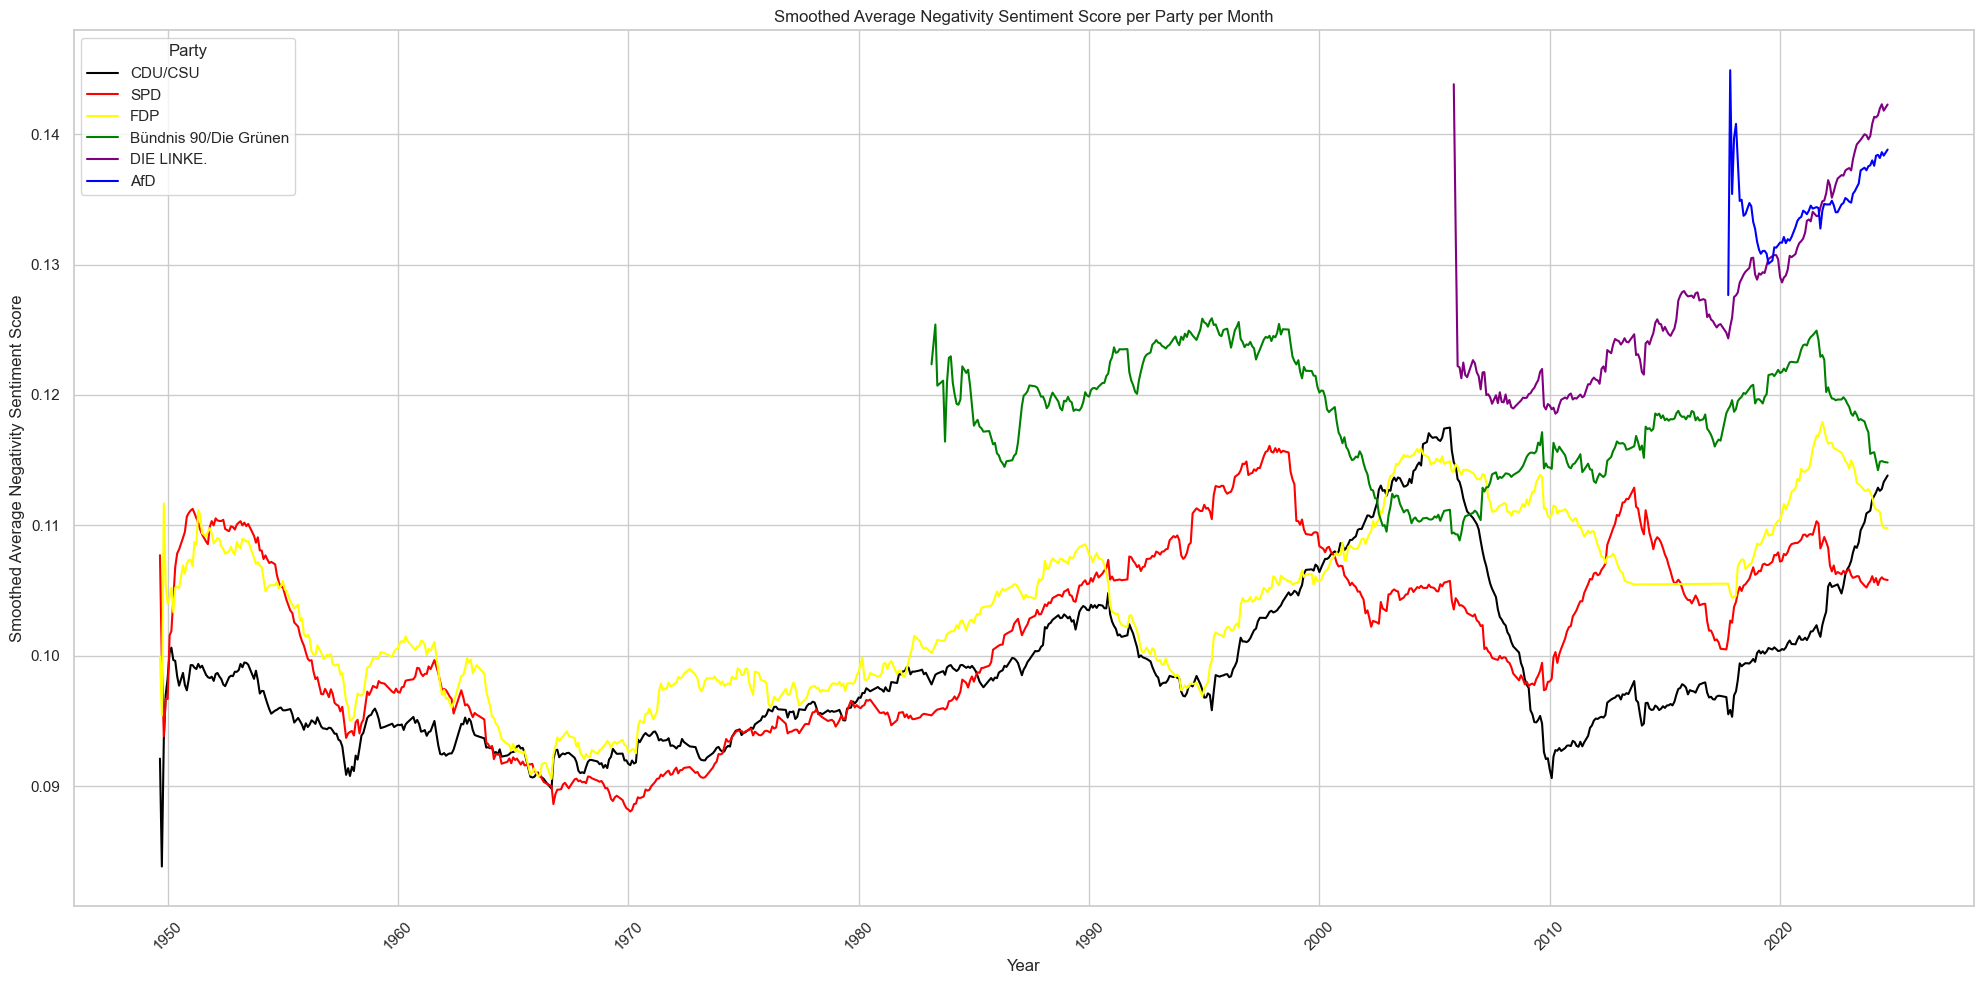

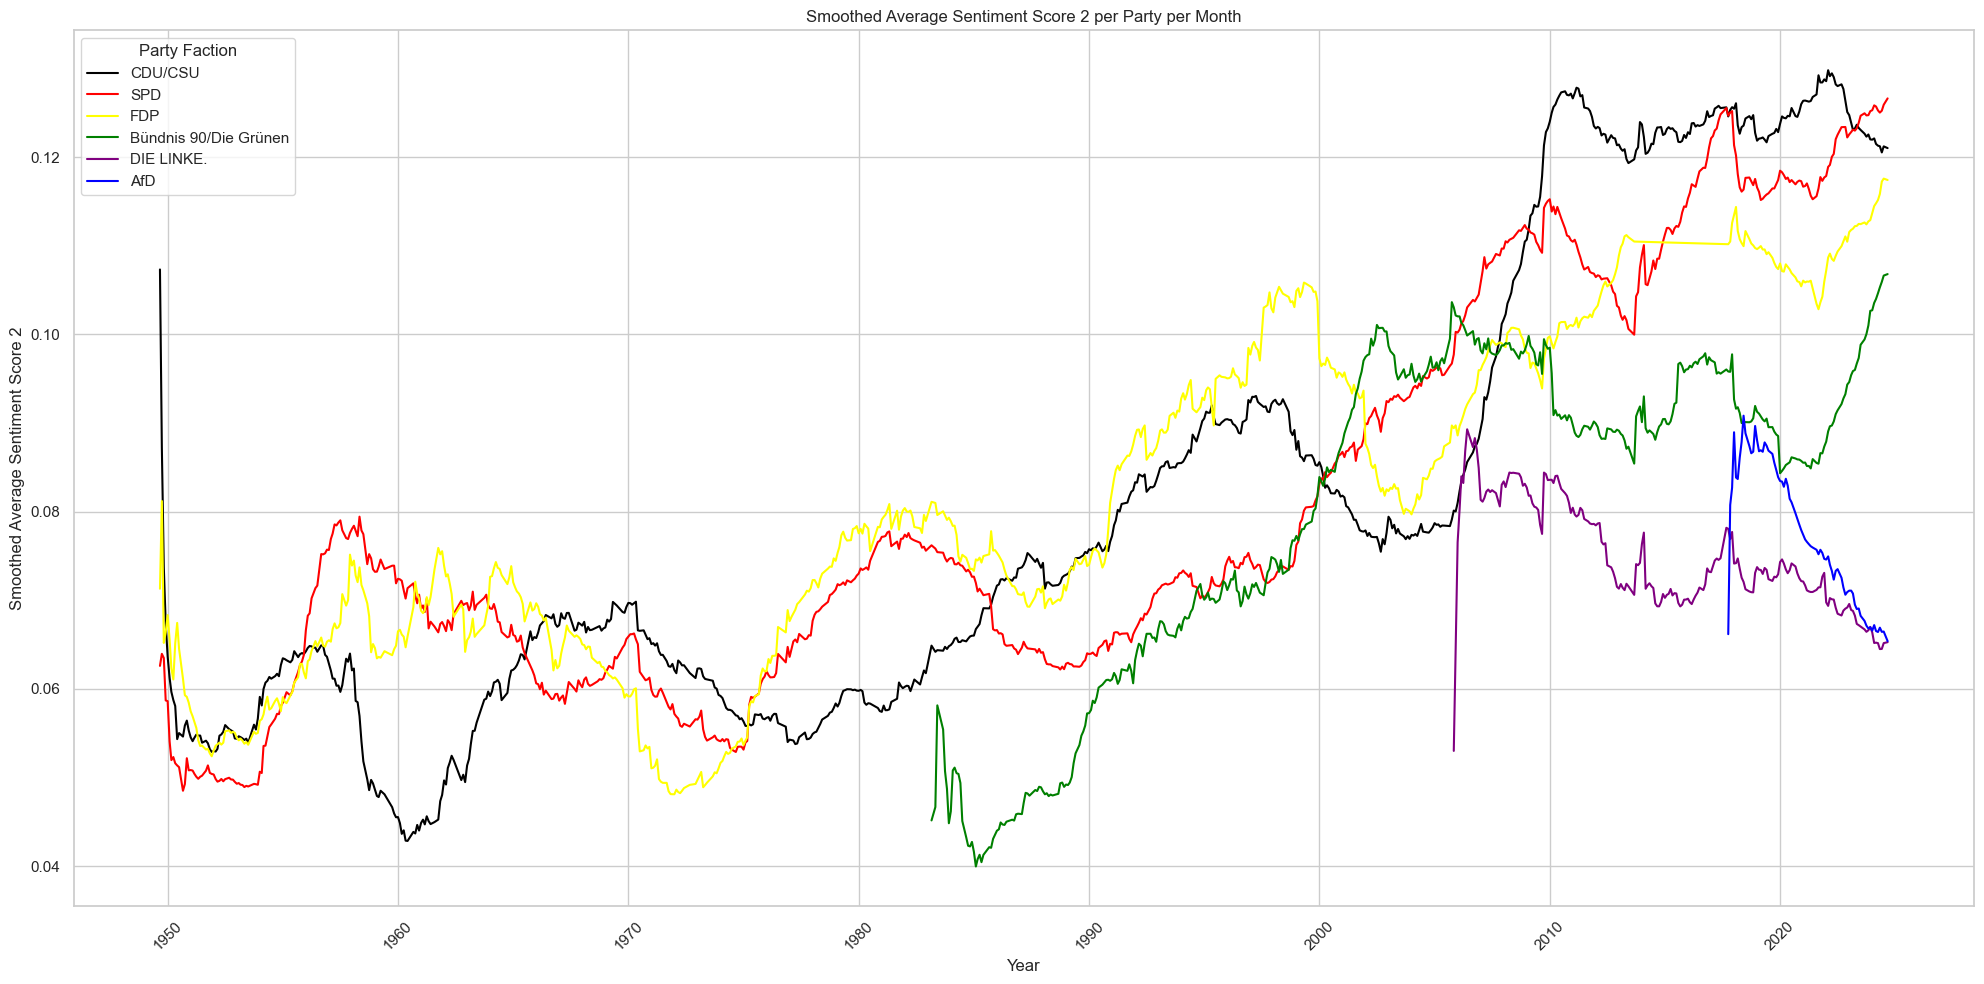

In [21]:
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'purple',
    'AfD': 'blue'
}

# Step 2: Ensure 'sentiment_score_1' and 'sentiment_score_2' are numeric, converting any non-numeric entries to NaN
speeches_with_sentiment['sentiment_score_1'] = pd.to_numeric(speeches_with_sentiment['sentiment_score_1'], errors='coerce')
speeches_with_sentiment['sentiment_score_2'] = pd.to_numeric(speeches_with_sentiment['sentiment_score_2'], errors='coerce')

# Step 3: Group by 'faction' and 'month' to calculate the average for each sentiment score
sentiment_scores_per_party_per_month = speeches_with_sentiment.groupby(['faction', 'month_year'])[['sentiment_score_1', 'sentiment_score_2']].mean().reset_index()

# Step 4: Convert 'month' back to datetime for plotting
sentiment_scores_per_party_per_month['month_year'] = sentiment_scores_per_party_per_month['month_year'].dt.to_timestamp()

# Step 5: Apply smoothing with a rolling average for each sentiment score
window_size = 48  # Adjust this for smoother or more responsive curves
smoothed_data = (
    sentiment_scores_per_party_per_month
    .set_index(['faction', 'month_year'])
    .groupby(level=0)[['sentiment_score_1', 'sentiment_score_2']]
    .apply(lambda x: x.rolling(window=window_size, min_periods=1).mean())  # Rolling average with specified window
    .reset_index()
)

# Step 6: Plot for sentiment_score_1
plt.figure(figsize=(20, 10))
for faction, color in color_map.items():
    faction_data = smoothed_data[smoothed_data['faction'] == faction]
    sns.lineplot(
        data=faction_data, 
        x='month_year', 
        y='sentiment_score_1', 
        label=faction, 
        color=color
    )

plt.title('Smoothed Average Negativity Sentiment Score per Party per Month')
plt.xlabel('Year')
plt.ylabel('Smoothed Average Negativity Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Party')
plt.tight_layout()

#save plot
plt.savefig('sentiment_score_1_smoothed.png', dpi=300)

plt.show()



# Step 7: Plot for sentiment_score_2
plt.figure(figsize=(20, 10))
for faction, color in color_map.items():
    faction_data = smoothed_data[smoothed_data['faction'] == faction]
    sns.lineplot(
        data=faction_data, 
        x='month_year', 
        y='sentiment_score_2', 
        label=faction, 
        color=color
    )

plt.title('Smoothed Average Sentiment Score 2 per Party per Month')
plt.xlabel('Year')
plt.ylabel('Smoothed Average Sentiment Score 2')
plt.xticks(rotation=45)
plt.legend(title='Party Faction')
plt.tight_layout()
plt.show()


## 3.3 Sentiments of governing factions vs. oposition

In [22]:
import numpy as np
import pandas as pd

# Define governing parties for each electoral term
regierung_mapping = {
    1: ['CDU/CSU', 'FDP', 'DP'],
    2: ['CDU/CSU', 'FDP', 'GB/BHE'],
    3: ['CDU/CSU'],
    4: ['CDU/CSU', 'FDP'],
    5: ['CDU/CSU', 'FDP'],
    6: ['SPD', 'FDP'],
    7: ['SPD', 'FDP'],
    8: ['SPD', 'FDP'],
    9: ['SPD', 'FDP'],
    10: ['CDU/CSU', 'FDP'],
    11: ['CDU/CSU', 'FDP'],
    12: ['CDU/CSU', 'FDP'],
    13: ['CDU/CSU', 'FDP'],
    14: ['SPD', 'Bündnis 90/Die Grünen'],
    15: ['SPD', 'Bündnis 90/Die Grünen'],
    16: ['CDU/CSU', 'SPD'],
    17: ['CDU/CSU', 'FDP'],
    18: ['CDU/CSU', 'SPD'],
    19: ['CDU/CSU', 'SPD'],
    20: ['SPD', 'FDP', 'Bündnis 90/Die Grünen']
}

# Function to label each faction as Governing or Opposition based on electoral term
def label_governing_opposition(row):
    term = row['electoral_term']
    if term in regierung_mapping:
        if row['faction'] in regierung_mapping[term]:
            return 'Governing'
        else:
            return 'Opposition'
    return np.nan  # For rows without a matching electoral term

# Apply the function to assign Governing or Opposition to each entry
speeches_with_sentiment['gov_opp'] = speeches_with_sentiment.apply(label_governing_opposition, axis=1)

# Group by 'electoral_term' and 'gov_opp' to calculate mean, median, and count for each sentiment score
gov_opp_summary = speeches_with_sentiment.groupby(['electoral_term', 'gov_opp']).agg(
    mean_score_1=('sentiment_score_1', 'mean'),
    median_score_1=('sentiment_score_1', 'median'),
    count_score_1=('sentiment_score_1', 'size'),
    mean_score_2=('sentiment_score_2', 'mean'),
    median_score_2=('sentiment_score_2', 'median'),
    count_score_2=('sentiment_score_2', 'size')
).reset_index()

# Display the result
print(gov_opp_summary)


    electoral_term     gov_opp  mean_score_1  median_score_1  count_score_1  \
0                1   Governing      0.103454        0.100346           6028   
1                1  Opposition      0.114342        0.107724           6216   
2                2   Governing      0.095961        0.092946           7246   
3                2  Opposition      0.097163        0.092546           6134   
4                3   Governing      0.096087        0.087528           5091   
5                3  Opposition      0.096961        0.091801           7990   
6                4   Governing      0.096051        0.078519          13441   
7                4  Opposition      0.093236        0.073264          11634   
8                5   Governing      0.094515        0.082074          18238   
9                5  Opposition      0.090587        0.070928          13804   
10               6   Governing      0.096035        0.085087           9794   
11               6  Opposition      0.091592        

In [23]:
# Map 'gov_opp' to binary values: 1 for Governing, 0 for Opposition
gov_opp_summary['gov_opp_binary'] = gov_opp_summary['gov_opp'].map({'Governing': 1, 'Opposition': 0})

# Calculate correlation for sentiment_score_1
correlation_score_1 = gov_opp_summary['gov_opp_binary'].corr(gov_opp_summary['mean_score_1'])

# Calculate correlation for sentiment_score_2
correlation_score_2 = gov_opp_summary['gov_opp_binary'].corr(gov_opp_summary['mean_score_2'])

# Display the results
print("Correlation between governing status and mean sentiment score 1:", correlation_score_1)
print("Correlation between governing status and mean sentiment score 2:", correlation_score_2)


Correlation between governing status and mean sentiment score 1: -0.4160605684435154
Correlation between governing status and mean sentiment score 2: 0.26639261802890346


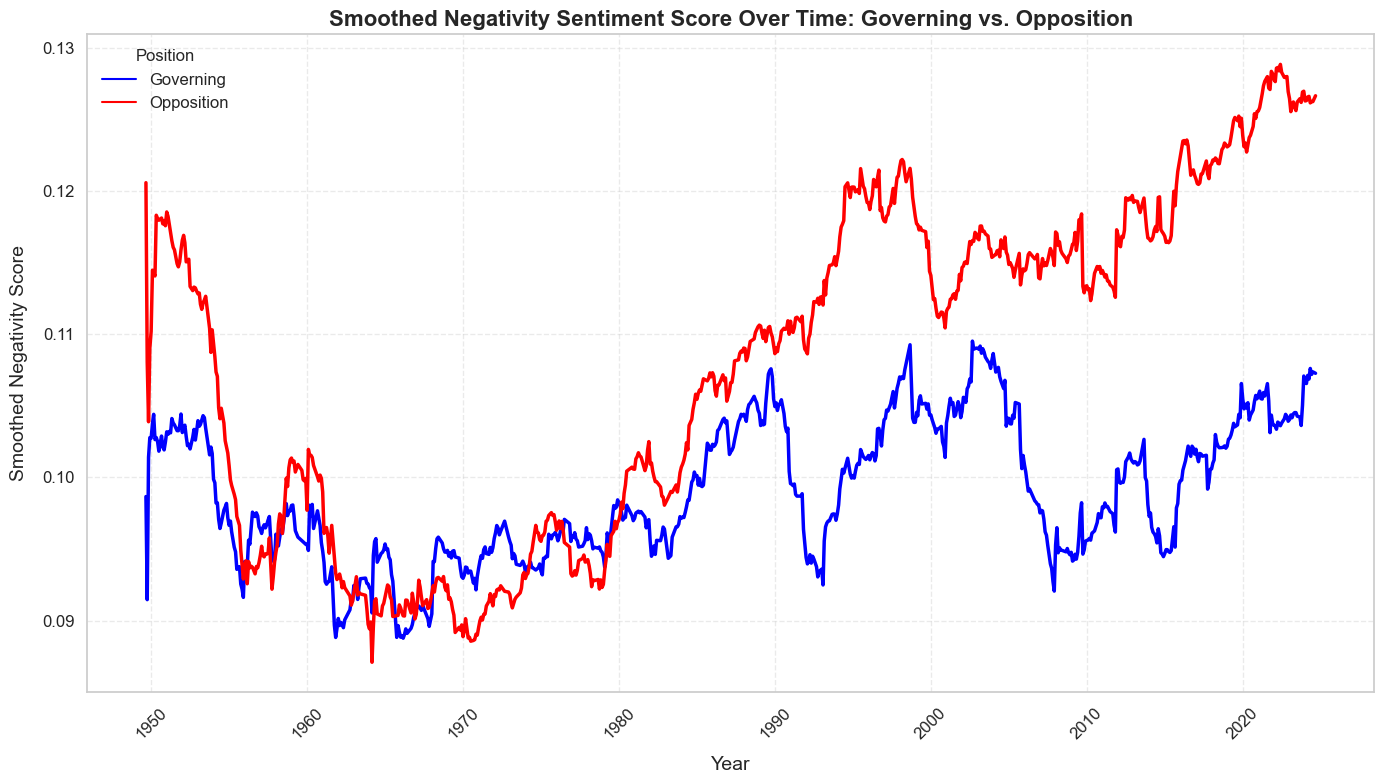

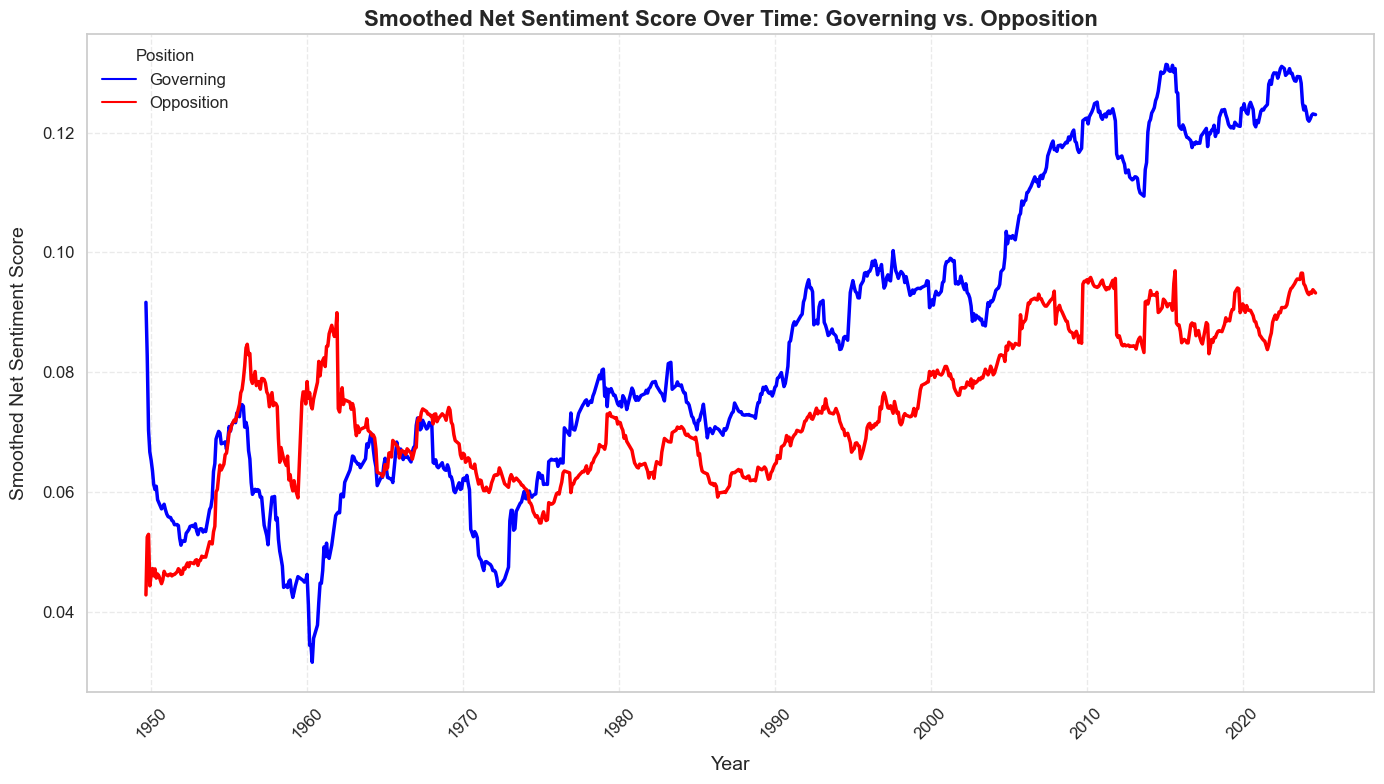

In [24]:
sns.set_theme(style="whitegrid")

# Group by 'month' and 'gov_opp' to calculate the mean for each sentiment score
monthly_sentiment = speeches_with_sentiment.groupby(['month_year', 'gov_opp'])[['sentiment_score_1', 'sentiment_score_2']].mean().reset_index()

# Convert 'month' back to datetime format for plotting
monthly_sentiment['month_year'] = monthly_sentiment['month_year'].dt.to_timestamp()

# Calculate a 24-month rolling average for each group (Governing and Opposition) and each sentiment score
monthly_sentiment['rolling_avg_1'] = (
    monthly_sentiment.groupby('gov_opp')['sentiment_score_1']
    .transform(lambda x: x.rolling(window=24, min_periods=1).mean())
)
monthly_sentiment['rolling_avg_2'] = (
    monthly_sentiment.groupby('gov_opp')['sentiment_score_2']
    .transform(lambda x: x.rolling(window=24, min_periods=1).mean())
)

# Set academic-style theme
sns.set_theme(style="whitegrid")

# Function to enhance plots
def customize_plot(title, xlabel, ylabel):
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(xlabel, fontsize=14, labelpad=10)
    plt.ylabel(ylabel, fontsize=14, labelpad=10)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Position', title_fontsize=12, fontsize=12, loc='upper left', frameon=False)
    plt.grid(alpha=0.4, linestyle='--')
    plt.tight_layout()

# Plot for `sentiment_score_1` with 24-month rolling average
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_sentiment,
    x='month_year',
    y='rolling_avg_1',
    hue='gov_opp',
    linewidth=2.5,
    palette={'Governing': 'blue', 'Opposition': 'red'},  # Clear, distinct colors
    legend='brief'
)
customize_plot(
    title='Smoothed Negativity Sentiment Score Over Time: Governing vs. Opposition',
    xlabel='Year',
    ylabel='Smoothed Negativity Score'
)
plt.savefig('sentiment_score_1_gov_opp.png', dpi=300)

plt.show()

# Plot for `sentiment_score_2` with 24-month rolling average
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=monthly_sentiment,
    x='month_year',
    y='rolling_avg_2',
    hue='gov_opp',
    linewidth=2.5,
    palette={'Governing': 'blue', 'Opposition': 'red'},  # Consistent coloring
    legend='brief'
)
customize_plot(
    title='Smoothed Net Sentiment Score Over Time: Governing vs. Opposition',
    xlabel='Year',
    ylabel='Smoothed Net Sentiment Score'
)
plt.show()


## 3.4 Topics Sentiment

In [102]:
# only keep 20 electoral term 
speeches_with_sentiment_section = speeches_with_sentiment[(speeches_with_sentiment['electoral_term']==20)]
speeches_with_sentiment_topics = pd.merge(speeches_with_sentiment_section, speech_content_topics_raw[['id', 'topic']], on='id', how='left')
speeches_with_sentiment_topics

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,year,speech_length,age,gender,tenure,sentiment_score_1,sentiment_score_2,month_year,gov_opp,topic
0,1066957,20,1,gabriele,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,katzmarek,25,Member of Parliament,NaN,11004325,...,2021,100,61.0,weiblich,7.704110,0.000000,0.285714,2021-10,Governing,No Topic
1,1066959,20,1,gabriele,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,katzmarek,25,Member of Parliament,NaN,11004325,...,2021,2425,61.0,weiblich,7.704110,0.058314,0.134146,2021-10,Governing,Binnenhandel: Verbraucherschutz
2,1066961,20,1,stefan,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,müller,5,Member of Parliament,NaN,11003597,...,2021,3727,46.0,männlich,18.980822,0.088672,0.074219,2021-10,Opposition,Recht & Kriminalität
3,1066963,20,1,britta,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,haßelmann,4,Member of Parliament,NaN,11003764,...,2021,4241,59.0,weiblich,15.780822,0.053138,0.092527,2021-10,Governing,Arbeit
4,1066965,20,1,marco,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,buschmann,15,Minister,Bundesminister der Justiz,11004023,...,2021,4498,44.0,männlich,11.747945,0.132334,0.137255,2021-10,Governing,Recht & Kriminalität
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31021,1075918,20,187,karoline,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,otte,4,Member of Parliament,NaN,11005172,...,2024,2870,28.0,weiblich,2.701370,0.124320,0.114428,2024-09,Governing,Öffentliche Verwaltung
31022,1075920,20,187,peter,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,aumer,5,Member of Parliament,NaN,11004004,...,2024,3166,48.0,männlich,14.668493,0.134362,0.076000,2024-09,Opposition,"Bürger:innenrechte: Flucht, Asyl & Einbürgerung"
31023,1075922,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,0,Member of Parliament,NaN,11004891,...,2024,1799,57.0,männlich,6.594521,0.112649,0.030534,2024-09,Opposition,Bürger:innenrechte
31024,1075924,20,187,thomas,https://dip21.bundestag.de/dip21/btp/20/20187.pdf,seitz,18,Member of Parliament,NaN,11004891,...,2024,12,57.0,männlich,6.594521,0.000000,0.500000,2024-09,Opposition,No Topic


In [103]:

# Replace specific strings in the 'topic' column
speeches_with_sentiment_topics['topic'] = speeches_with_sentiment_topics['topic'].str.replace("Bürger:innenrechte", "BürgerInnenrechte")

# Split 'topic' into 'main_category' and 'sub_category'
speeches_with_sentiment_topics[['main_category', 'sub_category']] = speeches_with_sentiment_topics['topic'].str.split(':', 1, expand=True)

# Step 2: Normalize Unicode and Strings in 'main_category'
# Define a function to normalize Unicode characters
def normalize_unicode(text):
    if pd.isna(text):  # Skip NaN values
        return text
    return unicodedata.normalize('NFC', text)  # Convert to composed form

# Apply Unicode normalization and string cleaning
speeches_with_sentiment_topics['main_category'] = (
    speeches_with_sentiment_topics['main_category']
    .apply(normalize_unicode)  # Normalize Unicode
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
    .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
)

# Step 3: Apply Category Mapping
# Define category mapping with regex
category_mapping = {
    r'^no topic.*': 'no topic',
    r'^öffentliche verwaltun.*': 'öffentliche verwaltung',
    r'^recht\s*&\s*kriminalitä.*': 'recht & kriminalität',
    r'^verteidigungspolitik.*': 'verteidigungspolitik',
    r'^sozialpolitik.*': 'sozialpolitik',
    r'^gesundheitswesen.*': 'gesundheitswesen',
    r'^arbei.*': 'arbeit',
    r'^energie.*': 'energie',
    r'^technologie.*': 'technologie',
    r'^umwelt.*': 'umwelt',
    r'^bürgerinnenrechte.*': 'bürgerinnenrechte',
    r'^transport.*': 'transport',
    r'^bildung.*': 'bildung',
    r'^wohnungswesen.*': 'wohnungswesen',
    r'^landwirtschaft.*': 'landwirtschaft',
    r'^volkswirtschaft.*': 'volkswirtschaft',
    r'^außenhandel.*': 'außenhandel',
    r'^sport.*': 'sport',
    r'^binnenhandel.*': 'binnenhandel',
    r'^wiedervereinigung.*': 'wiedervereinigung',
}

# Apply regex-based mapping to standardize categories
speeches_with_sentiment_topics['main_category'] = speeches_with_sentiment_topics['main_category'].replace(category_mapping, regex=True)

# Step 4: Verify and Debug
# Check unique categories after cleaning
unique_categories = speeches_with_sentiment_topics['main_category'].unique()
print("Unique categories after cleaning:", unique_categories)

# Translate categories into English
translations = {
    'arbeit': 'Work',
    'recht & kriminalität': 'Law & Crime',
    'bürgerinnenrechte': 'Civil Rights',
    'außenpolitik': 'Foreign Policy',
    'öffentliche verwaltung': 'Public Administration',
    'verteidigungspolitik': 'Defense Policy',
    'sozialpolitik': 'Social Policy',
    'wohnungswesen': 'Housing',
    'energie': 'Energy',
    'umwelt': 'Environment',
    'landwirtschaft': 'Agriculture',
    'transport': 'Transport',
    'gesundheitswesen': 'Healthcare',
    'bildung': 'Education',
    'volkswirtschaft': 'Economy',
    'binnenhandel': 'Domestic Trade',
    'technologie': 'Technology',
    'wiedervereinigung': 'Reunification',
    'außenhandel': 'Foreign Trade',
    'sport': 'Sports',
}

# Replace German categories with English translations
speeches_with_sentiment_topics['main_category'] = speeches_with_sentiment_topics['main_category'].replace(translations)

category_counts = speeches_with_sentiment_topics['main_category'].value_counts()
print("Category counts after cleaning:")
print(category_counts)

# calculate percentage of no topics
no_topic_count = category_counts['no topic']
total_count = category_counts.sum()
percentage_no_topic = no_topic_count / total_count * 100

# Display the percentage of speeches with no topic
print(f"Percentage of speeches with no topic: {percentage_no_topic:.2f}%")

Unique categories after cleaning: ['no topic' 'binnenhandel' 'recht & kriminalität' 'arbeit'
 'öffentliche verwaltung' 'sozialpolitik' 'verteidigungspolitik'
 'landwirtschaft' 'energie' 'bürgerinnenrechte' 'gesundheitswesen'
 'außenpolitik' 'transport' 'umwelt' 'wohnungswesen' 'technologie' 'sport'
 'bildung' 'volkswirtschaft' 'außenhandel' 'wiedervereinigung']
Category counts after cleaning:
no topic                 6978
Work                     2539
Defense Policy           2267
Civil Rights             2085
Law & Crime              1931
Energy                   1848
Technology               1565
Healthcare               1501
Social Policy            1330
Foreign Policy           1219
Domestic Trade           1210
Agriculture              1062
Environment              1055
Education                 937
Housing                   922
Transport                 792
Public Administration     663
Economy                   509
Foreign Trade             313
Sports                    292
Reun

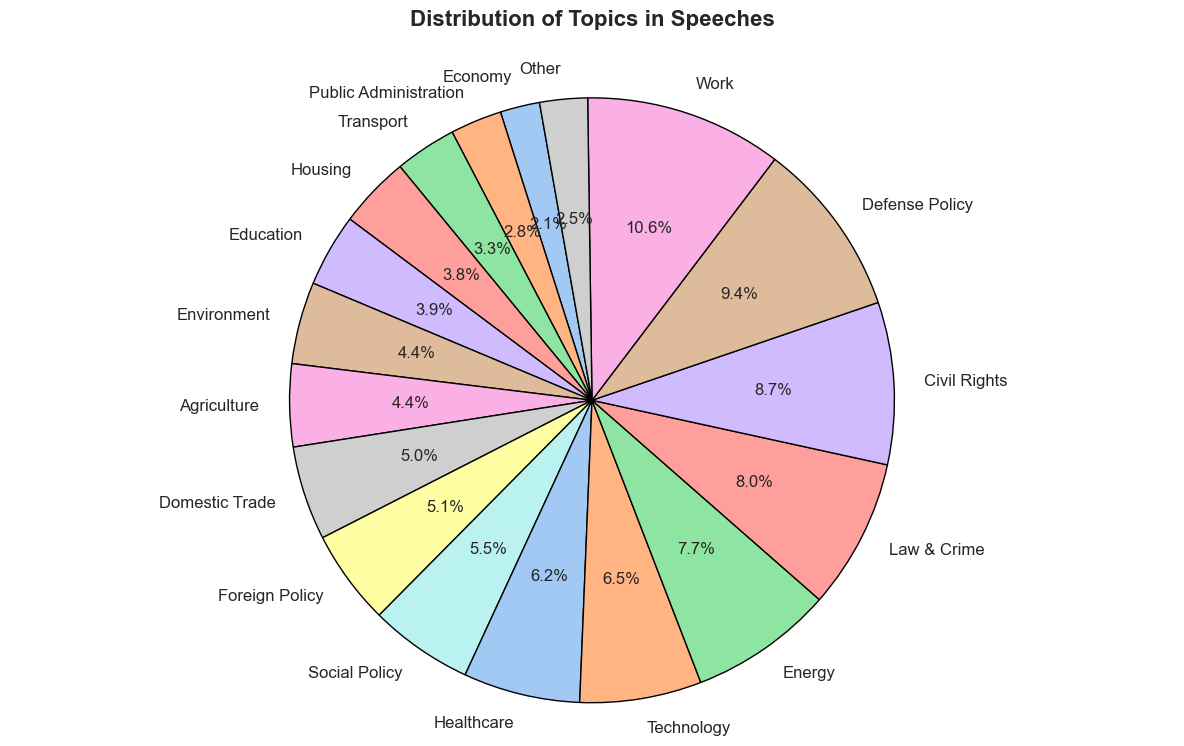

In [104]:
# Filter out "no topic" and calculate category percentages
speeches_with_sentiment_topics_without_no_topic = speeches_with_sentiment_topics[speeches_with_sentiment_topics['main_category'] != 'no topic']
category_counts = speeches_with_sentiment_topics_without_no_topic['main_category'].value_counts()
total_count = category_counts.sum()

# Group categories with less than 2% into "Other"
threshold = 0.02 * total_count  # Threshold for grouping
category_counts_grouped = category_counts.copy()
category_counts_grouped['Other'] = category_counts_grouped[category_counts_grouped < threshold].sum()
category_counts_grouped = category_counts_grouped[category_counts_grouped >= threshold]

# Place "Other" at the end
category_counts_grouped = category_counts_grouped.sort_values(ascending=True)
if 'Other' in category_counts_grouped.index:
    other_value = category_counts_grouped['Other']
    category_counts_grouped = category_counts_grouped.drop('Other')
    category_counts_grouped['Other'] = other_value

# Labels for the pie chart
labels = category_counts_grouped.index

# Plot the pie chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel', len(category_counts_grouped))  # Use a pastel color palette
wedges, texts, autotexts = plt.pie(
    category_counts_grouped,
    labels=labels,
    autopct='%1.1f%%',
    startangle=100,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},  # Add black borders for better separation
    textprops={'fontsize': 12}  # Adjust text size for readability
)

# Add a title and styling
plt.title('Distribution of Topics in Speeches', fontsize=16, weight='bold', y=1.05)  # Add more space between the title and the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent label/title overlap

# save plot
plt.savefig('topic_distribution.png', dpi=300)
# Show the plot
plt.show()



### 3.4.1 Main Topic

In [51]:
category_counts = speeches_with_sentiment_topics['main_category'].value_counts()
valid_categories = category_counts[category_counts >= 500].index.tolist()
filtered_data = speeches_with_sentiment_topics[speeches_with_sentiment_topics['main_category'].isin(valid_categories) & 
                                                (speeches_with_sentiment_topics['main_category'] != 'no topic')]



# Aggregate data: mean, median, std for sentiment_score_1
sentiment_by_main_category = filtered_data.groupby('main_category').agg({
    'sentiment_score_1': ['mean', 'std'],
    'sentiment_score_2': ['mean', 'std']
}).reset_index()

# Flatten the multi-index columns
sentiment_by_main_category.columns = ['main_category', 
                                       'mean_score_1', 'std_score_1',
                                       'mean_score_2', 'std_score_2']

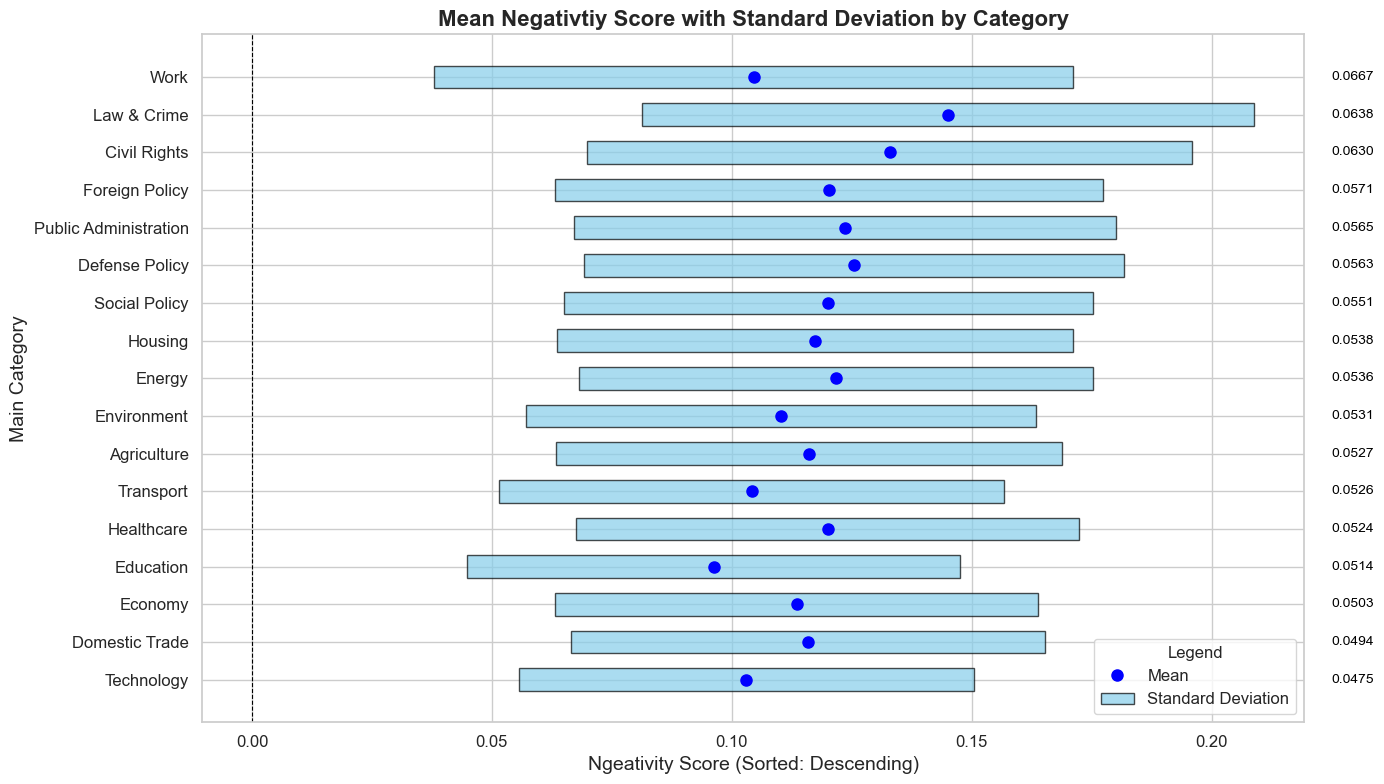

In [101]:
# Sort by mean_score_1 for better visualization
sentiment_by_main_category = sentiment_by_main_category.sort_values(by='std_score_1', ascending=True).reset_index(drop=True)

# Set up the figure size and style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Define a consistent offset for standard deviation labels
label_offset = sentiment_by_main_category['mean_score_1'].max() + 0.08  # Set a fixed alignment for all labels

# Plot the bars showing mean and standard deviation as the range
for i, row in sentiment_by_main_category.iterrows():
    # Draw the full bar representing mean ± std
    plt.barh(row['main_category'], row['std_score_1'] * 2,  # Full range is 2 * std
             left=row['mean_score_1'] - row['std_score_1'],  # Start position
             height=0.6, color='skyblue', edgecolor='black', alpha=0.7, label='Standard Deviation' if i == 0 else "")

    # Highlight the mean with a marker
    plt.plot(row['mean_score_1'], row['main_category'], 'o', color='blue', markersize=8, label='Mean' if i == 0 else "")

    # Annotate the standard deviation value to the far right
    plt.text(label_offset, i, f"{row['std_score_1']:.4f}", va='center', fontsize=10, color='black')

# Customize the plot
plt.title('Mean Negativtiy Score with Standard Deviation by Category', fontsize=16, weight='bold')
plt.xlabel('Ngeativity Score (Sorted: Descending)', fontsize=14)
plt.ylabel('Main Category', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at zero for reference
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='lower right', fontsize=12, title='Legend', title_fontsize=12)

# Adjust layout
plt.tight_layout()

#save
plt.savefig('mean_sentiment_score_1_std_by_category.png', dpi=300)

# Show the plot
plt.show()


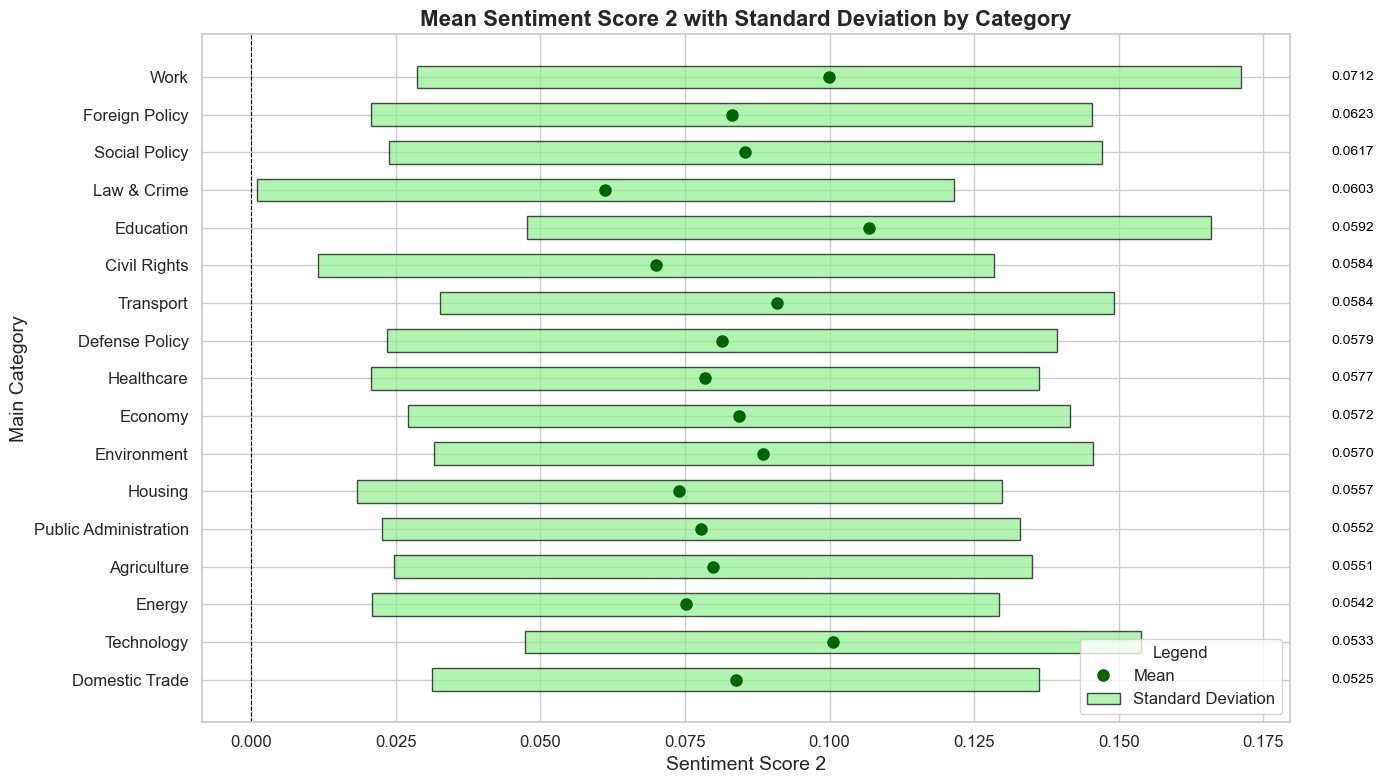

In [69]:
sentiment_by_main_category = sentiment_by_main_category.sort_values(by='std_score_2', ascending=True).reset_index(drop=True)


# Set up the figure size and style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Define a consistent offset for standard deviation labels
label_offset = sentiment_by_main_category['mean_score_2'].max() + 0.08  # Set a fixed alignment for all labels

# Plot the bars showing mean and standard deviation as the range
for i, row in sentiment_by_main_category.iterrows():
    # Draw the full bar representing mean ± std
    plt.barh(row['main_category'], row['std_score_2'] * 2,  # Full range is 2 * std
             left=row['mean_score_2'] - row['std_score_2'],  # Start position
             height=0.6, color='lightgreen', edgecolor='black', alpha=0.7, label='Standard Deviation' if i == 0 else "")

    # Highlight the mean with a marker
    plt.plot(row['mean_score_2'], row['main_category'], 'o', color='darkgreen', markersize=8, label='Mean' if i == 0 else "")

    # Annotate the standard deviation value to the far right
    plt.text(label_offset, i, f"{row['std_score_2']:.4f}", va='center', fontsize=10, color='black')

# Customize the plot
plt.title('Mean Sentiment Score 2 with Standard Deviation by Category', fontsize=16, weight='bold')
plt.xlabel('Sentiment Score 2', fontsize=14)
plt.ylabel('Main Category', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at zero for reference
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='lower right', fontsize=12, title='Legend', title_fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### 3.4.2 Sub Topic

In [81]:
# show unnique sub categories
speeches_with_sentiment_topics['sub_category'].value_counts()

sub_category_counts = speeches_with_sentiment_topics['sub_category'].value_counts()
valid_sub_categories = sub_category_counts[sub_category_counts >= 200].index.tolist()
filtered_sub_data = speeches_with_sentiment_topics[speeches_with_sentiment_topics['sub_category'].isin(valid_sub_categories) & 
                                                (speeches_with_sentiment_topics['sub_category'] != 'No Topic')&
                                                (speeches_with_sentiment_topics['sub_category']!= ' Nachkriegsordnung')]

# Aggregate data: mean, median, std for sentiment_score_1
sentiment_by_sub_category = filtered_sub_data.groupby('sub_category').agg({
    'sentiment_score_1': ['mean', 'std', 'count'],
    'sentiment_score_2': ['mean', 'std', 'count']
}).reset_index()

# Flatten the multi-index columns
sentiment_by_sub_category.columns = ['sub_category', 
                                       'mean_score_1', 'std_score_1','count_score_1',
                                       'mean_score_2', 'std_score_2', 'count_score_2']

# Sort by mean_score_1 for better visualization
sentiment_by_sub_category = sentiment_by_sub_category.sort_values(by='std_score_1', ascending=True)

sentiment_by_sub_category

,sub_category,mean_score_1,std_score_1,count_score_1,mean_score_2,std_score_2,count_score_2
2,Digitalisierung,0.099466,0.044920,1329,0.105285,0.051641,1329
19,Verbraucherschutz,0.111838,0.047266,399,0.088055,0.049745,399
1,Dieselskandal,0.110034,0.047661,255,0.086280,0.051442,255
12,Mindestlohn,0.113181,0.047829,775,0.089930,0.052635,775
6,Forschung,0.092996,0.047915,312,0.112886,0.054624,312
13,Mittelstand,0.119670,0.048218,582,0.080637,0.052819,582
18,Tierschutz,0.109693,0.048769,298,0.081924,0.057317,298
17,Steuern,0.111790,0.048965,220,0.086766,0.050931,220
9,Haushalt,0.115774,0.049677,254,0.082223,0.056736,254
11,Klima- & Umweltschutz,0.106983,0.051370,200,0.097102,0.058655,200


<Figure size 1400x1000 with 0 Axes>

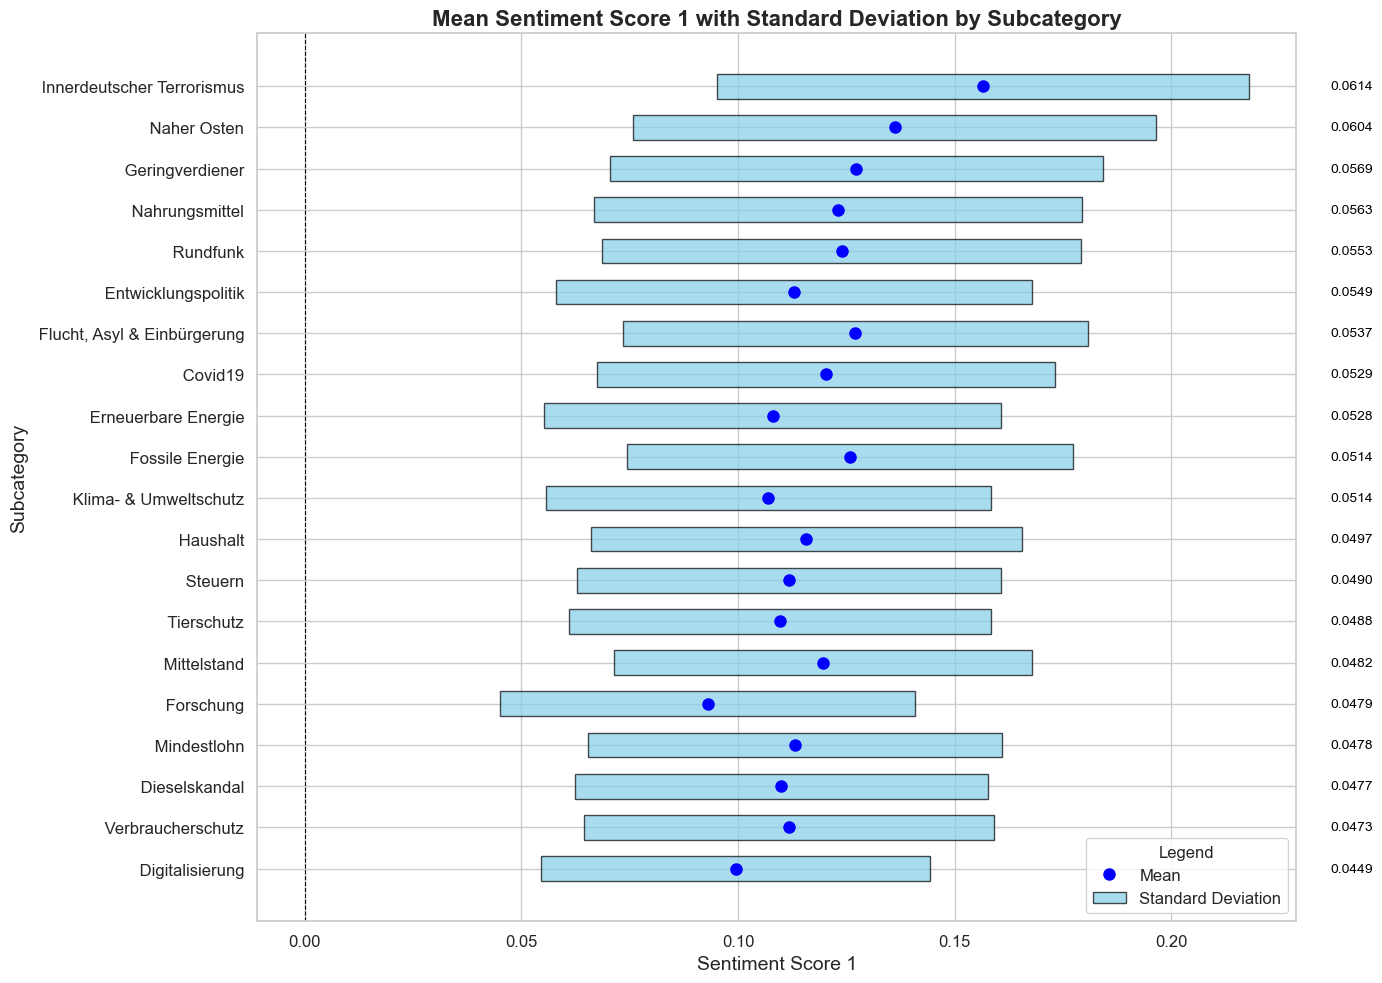

In [82]:
# Set up the figure size and style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 10))

# Define a consistent offset for standard deviation labels for both Sentiment Score 1 and Score 2
label_offset_1 = sentiment_by_sub_category['mean_score_1'].max() + 0.08  # For Score 1
label_offset_2 = sentiment_by_sub_category['mean_score_2'].max() + 0.08  # For Score 2

# --- Plot for Sentiment Score 1 ---

sentiment_by_sub_category = sentiment_by_sub_category.sort_values(by='std_score_1', ascending=True).reset_index(drop=True)

plt.figure(figsize=(14, 10))
for i, row in sentiment_by_sub_category.iterrows():
    # Draw the full bar representing mean ± std for sentiment_score_1
    plt.barh(row['sub_category'], row['std_score_1'] * 2,  # Full range is 2 * std
             left=row['mean_score_1'] - row['std_score_1'],  # Start position
             height=0.6, color='skyblue', edgecolor='black', alpha=0.7, label='Standard Deviation' if i == 0 else "")

    # Highlight the mean with a marker for sentiment_score_1
    plt.plot(row['mean_score_1'], row['sub_category'], 'o', color='blue', markersize=8, label='Mean' if i == 0 else "")

    # Annotate the standard deviation value for sentiment_score_1
    plt.text(label_offset_1, i, f"{row['std_score_1']:.4f}", va='center', fontsize=10, color='black')

# Customize the plot for Sentiment Score 1
plt.title('Mean Sentiment Score 1 with Standard Deviation by Subcategory', fontsize=16, weight='bold')
plt.xlabel('Sentiment Score 1', fontsize=14)
plt.ylabel('Subcategory', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at zero for reference
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='lower right', fontsize=12, title='Legend', title_fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot for Sentiment Score 1
plt.show()


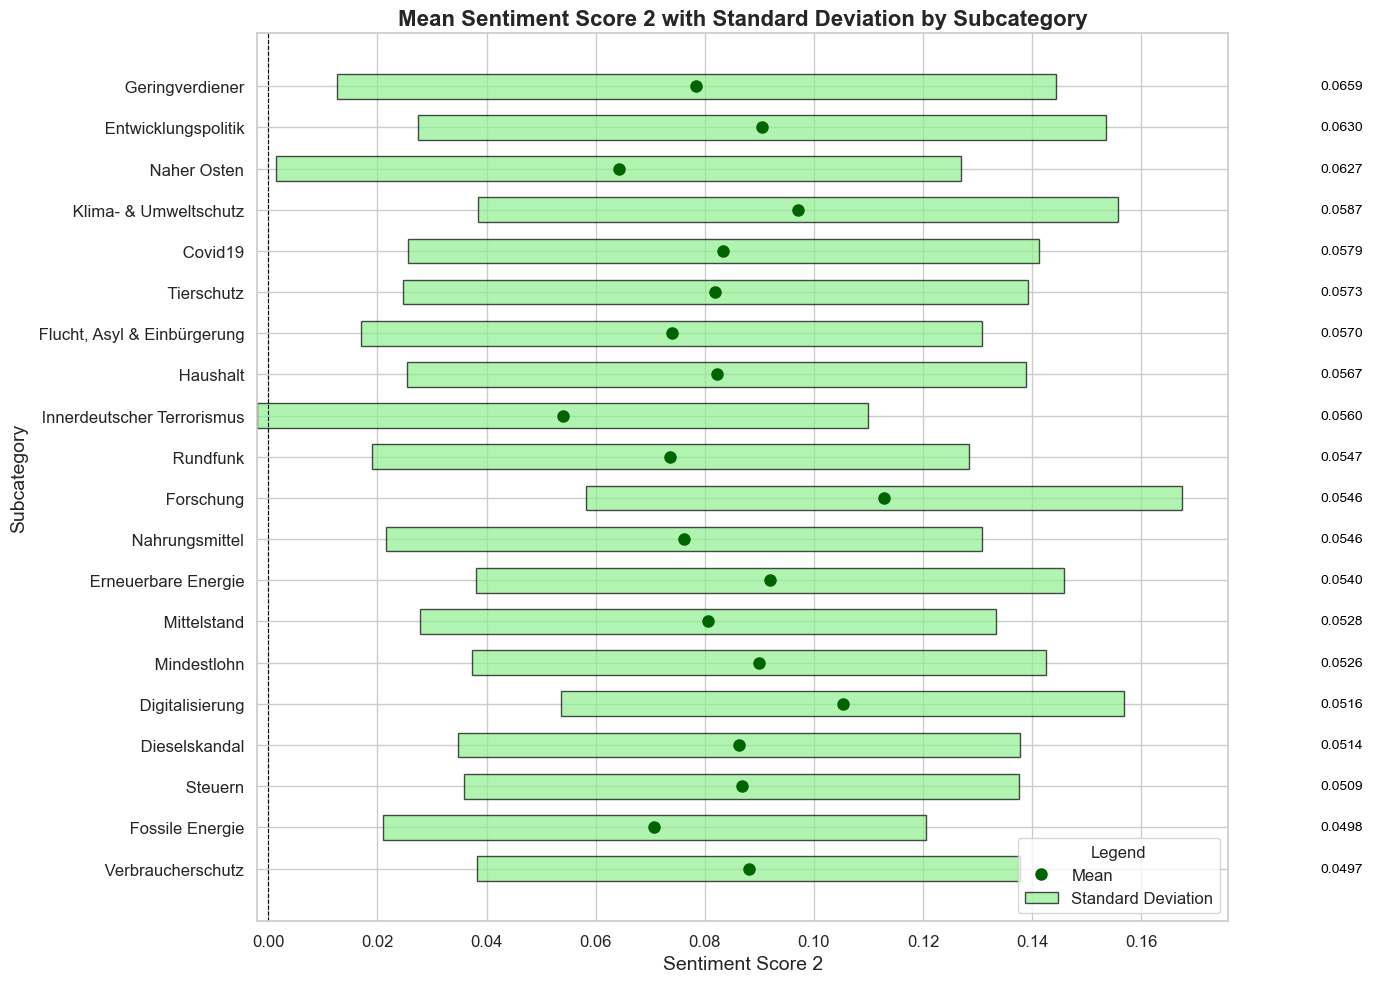

In [83]:
sentiment_by_sub_category = sentiment_by_sub_category.sort_values(by='std_score_2', ascending=True).reset_index(drop=True)


plt.figure(figsize=(14, 10))
for i, row in sentiment_by_sub_category.iterrows():
    # Draw the full bar representing mean ± std for sentiment_score_2
    plt.barh(row['sub_category'], row['std_score_2'] * 2,  # Full range is 2 * std
             left=row['mean_score_2'] - row['std_score_2'],  # Start position
             height=0.6, color='lightgreen', edgecolor='black', alpha=0.7, label='Standard Deviation' if i == 0 else "")

    # Highlight the mean with a marker for sentiment_score_2
    plt.plot(row['mean_score_2'], row['sub_category'], 'o', color='darkgreen', markersize=8, label='Mean' if i == 0 else "")

    # Annotate the standard deviation value for sentiment_score_2
    plt.text(label_offset_2, i, f"{row['std_score_2']:.4f}", va='center', fontsize=10, color='black')

# Customize the plot for Sentiment Score 2
plt.title('Mean Sentiment Score 2 with Standard Deviation by Subcategory', fontsize=16, weight='bold')
plt.xlabel('Sentiment Score 2', fontsize=14)
plt.ylabel('Subcategory', fontsize=14)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Add a vertical line at zero for reference
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(loc='lower right', fontsize=12, title='Legend', title_fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot for Sentiment Score 2
plt.show()